#### Hi guys, just a word of warning that this is still very rough and it's still missing a lot of markdown and comments to explain what I'm trying to do. Hope that in general in makes sense though!

### Preprocessing and EDA

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

In [2]:
print(os.listdir('./data'))

['opel_corsa_01.csv', 'opel_corsa_02.csv', 'peugeot_207_01.csv', 'peugeot_207_02.csv']


In [3]:
df1 = pd.read_csv('./data/opel_corsa_01.csv', delimiter=';')
df1.dataframeName = 'opel_01.'

df2 = pd.read_csv('./data/opel_corsa_02.csv', delimiter=';')
df2.dataframeName = 'opel_02'

df3 = pd.read_csv('./data/peugeot_207_01.csv', delimiter=';')
df3.dataframeName = 'peugeot_01'

df4 = pd.read_csv('./data/peugeot_207_02.csv', delimiter=';')
df4.dataframeName = 'peugeot_02'

df_list = [df1, df2, df3, df4]

for df in df_list:
    name = df.dataframeName
    nRow, nCol = df.shape
    print(f'In {name}, there are {nRow} rows and {nCol} columns. \n')

In opel_01., there are 7038 rows and 18 columns. 

In opel_02, there are 4092 rows and 18 columns. 

In peugeot_01, there are 8199 rows and 18 columns. 

In peugeot_02, there are 4446 rows and 18 columns. 



We can see that the first trip for both cars is almost twice as long as the second trip.

Let's explore the individual datasets before joining them. First, let's take a look at the structure of the datasets.

In [4]:
df1.head()

Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
0          59          -2.299988                  25.670519   
1          60          -2.099976                  24.094259   
2          61          -1.500000                  22.743179   
3          62           0.100037                  22.292820   
4          63           0.099976                  23.643900   

   VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
0            13.223501            121.592690              -2.476980   
1            13.638919            120.422571              -1.576260   
2            14.031043            118.456769              -1.351080   
3            14.171073            117.571308              -0.450359   
4            14.328954            117.074149               1.351080   

   LongitudinalAcceleration  EngineLoad  EngineCoolantTemperature  \
0                    0.3555    4.705883                        68   
1                    0.4492   10.588236                        68   
2                    0.4258   27.450981                        68   
3                    0.4140   24.313726                        69   
4                    0.3945   20.000000                        69   

   ManifoldAbsolutePressure  EngineRPM  MassAirFlow  IntakeAirTemperature  \
0                       106       1796        15.81                    24   
1                       103       1689        14.65                    22   
2                       103       1599        11.85                    21   
3                       104       1620        12.21                    20   
4                       104       1708        11.91                    21   

   VerticalAcceleration  FuelConsumptionAverage      roadSurface  \
0               -0.1133               19.497335  SmoothCondition   
1               -0.1289               19.515722  SmoothCondition   
2               -0.1328               19.441765  SmoothCondition   
3               -0.0859               19.388769  SmoothCondition   
4               -0.0664               19.301638  SmoothCondition   

                  traffic   drivingStyle  
0  LowCongestionCondition  EvenPaceStyle  
1  LowCongestionCondition  EvenPaceStyle  
2  LowCongestionCondition  EvenPaceStyle  
3  LowCongestionCondition  EvenPaceStyle  
4  LowCongestionCondition  EvenPaceStyle

In [5]:
df1.tail()

Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
7033        7387          -4.900024                 110.788551   
7034        7388          -5.200012                 110.788551   
7035        7389          -5.000000                 111.689278   
7036        7390          -5.200012                 111.013740   
7037        7391          -5.899963                 108.086395   

      VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
7033           114.248823             37.916017               1.801430   
7034           114.079938             37.335264               0.000000   
7035           113.914806             36.446619               0.900726   
7036           113.693379             34.711628              -0.675537   
7037           113.423163             33.263671              -2.927345   

      LongitudinalAcceleration  EngineLoad  EngineCoolantTemperature  \
7033                    0.0273   17.647058                        82   
7034                    0.0625   23.137255                        82   
7035                    0.0391   29.803923                        82   
7036                    0.0625   37.647060                        82   
7037                    0.1719   26.666668                        81   

      ManifoldAbsolutePressure  EngineRPM  MassAirFlow  IntakeAirTemperature  \
7033                       111       2216    18.010000                    21   
7034                       112       2209    16.900000                    20   
7035                       113       2208    18.760000                    20   
7036                       120       2210    21.690001                    21   
7037                       121       2214    17.600000                    21   

      VerticalAcceleration  FuelConsumptionAverage      roadSurface  \
7033                0.1406                9.631930  SmoothCondition   
7034                0.1289                9.565511  SmoothCondition   
7035                0.1016                9.495973  SmoothCondition   
7036                0.0742                9.433368  SmoothCondition   
7037                0.1406                9.362569  SmoothCondition   

                     traffic   drivingStyle  
7033  LowCongestionCondition  EvenPaceStyle  
7034  LowCongestionCondition  EvenPaceStyle  
7035  LowCongestionCondition  EvenPaceStyle  
7036  LowCongestionCondition  EvenPaceStyle  
7037  LowCongestionCondition  EvenPaceStyle

In [6]:
#looking at the data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7038 entries, 0 to 7037
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 7038 non-null   int64  
 1   AltitudeVariation          7038 non-null   float64
 2   VehicleSpeedInstantaneous  7038 non-null   float64
 3   VehicleSpeedAverage        7038 non-null   float64
 4   VehicleSpeedVariance       7038 non-null   float64
 5   VehicleSpeedVariation      7038 non-null   float64
 6   LongitudinalAcceleration   7038 non-null   float64
 7   EngineLoad                 7038 non-null   float64
 8   EngineCoolantTemperature   7038 non-null   int64  
 9   ManifoldAbsolutePressure   7038 non-null   int64  
 10  EngineRPM                  7038 non-null   int64  
 11  MassAirFlow                7038 non-null   float64
 12  IntakeAirTemperature       7038 non-null   int64  
 13  VerticalAcceleration       7038 non-null   float

In [7]:
#descriptive statistics
df1.describe()

Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
count  7038.000000        7038.000000                7038.000000   
mean   3772.072748          -0.675845                  36.428319   
std    2118.196795           1.691601                  32.901312   
min      59.000000          -9.200012                   0.000000   
25%    1936.250000          -1.500000                   8.782019   
50%    3813.500000          -0.399963                  29.273399   
75%    5612.750000           0.100037                  54.043198   
max    7391.000000           5.200012                 124.749725   

       VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
count          7038.000000           7038.000000            7038.000000   
mean             36.723932            213.004353              -0.029563   
std              29.366391            205.717663               2.390997   
min               0.000000              0.000000             -17.789218   
25%              16.698035             54.333652              -0.900722   
50%              28.312631            144.864363               0.000000   
75%              47.595544            299.377339               0.900721   
max             121.330733           1051.789888              12.384899   

       LongitudinalAcceleration   EngineLoad  EngineCoolantTemperature  \
count               7038.000000  7038.000000               7038.000000   
mean                   0.143530    26.487416                 77.924979   
std                    0.744697    19.462750                  7.076616   
min                   -2.380000     0.000000                 40.000000   
25%                   -0.339800    13.725491                 79.000000   
50%                    0.140800    25.490196                 80.000000   
75%                    0.683600    34.901962                 81.000000   
max                    2.360000   100.000000                 85.000000   

       ManifoldAbsolutePressure    EngineRPM  MassAirFlow  \
count               7038.000000  7038.000000  7038.000000   
mean                 116.234157  1569.145354    16.358274   
std                   20.660674   551.406613     9.488889   
min                   98.000000   752.000000     4.010000   
25%                  102.000000   936.000000     8.080000   
50%                  109.000000  1659.500000    15.330000   
75%                  122.000000  2033.000000    21.690001   
max                  252.000000  3104.000000    73.250000   

       IntakeAirTemperature  VerticalAcceleration  FuelConsumptionAverage  
count           7038.000000           7038.000000             7038.000000  
mean              16.048878              0.055929               15.446272  
std                4.342145              0.379679                4.311013  
min                7.000000             -1.246000                7.271883  
25%               12.000000             -0.222700               12.319374  
50%               16.000000              0.070300               15.284765  
75%               19.000000              0.312000               18.393147  
max               34.000000              1.210000               25.666862

In [8]:
df2.describe()

Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
count  4092.000000        4092.000000                4092.000000   
mean   2198.175953          -0.139590                  43.482246   
std    1248.536624           2.484872                  37.543881   
min      44.000000          -8.299988                   0.000000   
25%    1125.750000          -2.800003                  11.259000   
50%    2188.500000           0.000000                  34.452538   
75%    3285.250000           1.024994                  70.312449   
max    4327.000000          10.700012                 122.723091   

       VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
count          4092.000000           4092.000000            4092.000000   
mean             43.419217            162.980180              -0.011556   
std              35.323457            162.805408               2.227681   
min               0.000000              0.000000             -11.934539   
25%              14.868447             42.682230              -0.900719   
50%              26.422996            106.038210               0.000000   
75%              70.051620            240.313896               0.900722   
max             114.706688            956.695096              11.259000   

       LongitudinalAcceleration   EngineLoad  EngineCoolantTemperature  \
count               4092.000000  4092.000000               4092.000000   
mean                   1.603635    34.509613                 73.378299   
std                    3.057510    23.559170                 12.875391   
min                   -1.710800     0.000000                 40.000000   
25%                   -0.254950    20.000000                 64.000000   
50%                    0.125000    30.588236                 80.000000   
75%                    1.060000    47.843140                 83.000000   
max                    8.477800   100.000000                 89.000000   

       ManifoldAbsolutePressure    EngineRPM  MassAirFlow  \
count               4092.000000  4092.000000  4092.000000   
mean                 123.764907  1656.040811    18.608326   
std                   30.908416   575.566227    12.334384   
min                   98.000000   760.000000     4.270000   
25%                  101.000000  1087.000000     8.445000   
50%                  110.000000  1762.500000    15.820000   
75%                  136.000000  2156.000000    25.330000   
max                  250.000000  3167.000000    67.309998   

       IntakeAirTemperature  VerticalAcceleration  FuelConsumptionAverage  
count           4092.000000           4092.000000             4092.000000  
mean              18.521261              4.061078               17.400087  
std                3.408300              7.221253                5.970610  
min               10.000000             -1.140000                7.929113  
25%               16.000000             -0.007800               11.634232  
50%               18.000000              0.223000               18.079138  
75%               20.000000              0.716000               21.760530  
max               30.000000             17.944800               45.336861

In [9]:
df3.describe()

Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
count  8199.000000        8199.000000                8196.000000   
mean   4289.953531          -0.167142                  46.627707   
std    2482.291344           2.271266                  35.940316   
min      59.000000         -24.600006                   0.000000   
25%    2118.500000          -1.300003                  18.900000   
50%    4285.000000          -0.099998                  37.799999   
75%    6393.500000           0.900002                  81.000000   
max    8613.000000          10.299999                 119.699997   

       VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
count          8199.000000           8199.000000            8199.000000   
mean             46.889535            159.545051              -0.020856   
std              33.502960            188.542234               2.760644   
min               0.000000              0.000000            -103.500000   
25%              19.582499             41.323268              -0.900000   
50%              35.954999            103.799893               0.000000   
75%              75.337498            202.930619               0.900002   
max             114.884996           1418.370369              97.199997   

       LongitudinalAcceleration   EngineLoad  EngineCoolantTemperature  \
count               8199.000000  8194.000000               8194.000000   
mean                   1.127696    45.079854                 68.191237   
std                    0.759994    30.615258                 17.535489   
min                   -1.457600     0.000000                 12.000000   
25%                    0.578950    23.137255                 56.000000   
50%                    1.161900    40.392159                 79.000000   
75%                    1.646400    75.686279                 79.000000   
max                    3.979800   100.000000                 86.000000   

       ManifoldAbsolutePressure    EngineRPM  MassAirFlow  \
count               8194.000000  8194.000000  8194.000000   
mean                 115.252990  1520.705394    16.992544   
std                   16.322914   611.017251     9.174752   
min                   88.000000     0.000000     0.880000   
25%                  103.000000   898.625000     7.300000   
50%                  107.000000  1496.500000    17.219999   
75%                  126.000000  1975.375000    24.740000   
max                  170.000000  2802.500000    38.549999   

       IntakeAirTemperature  VerticalAcceleration  FuelConsumptionAverage  
count           8194.000000           8199.000000             8194.000000  
mean              33.897120             -0.649417               12.986515  
std               11.639077              0.640123                3.136726  
min                8.000000             -2.763100                7.847495  
25%               24.000000             -1.052800               10.086075  
50%               36.000000             -0.649800               12.868294  
75%               41.000000             -0.180550               14.868025  
max               65.000000              0.999900               27.919697

In [10]:
df4.describe()

Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
count  4446.000000        4446.000000                4440.000000   
mean   2333.006073           0.100135                  22.962508   
std    1323.814689           1.797515                  18.623617   
min      59.000000          -9.199997                   0.000000   
25%    1170.250000          -0.599998                   5.400000   
50%    2322.500000           0.000000                  22.500000   
75%    3467.750000           0.900002                  36.899998   
max    4622.000000          11.400002                  72.000000   

       VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
count          4446.000000           4446.000000            4446.000000   
mean             22.975994            137.937403              -0.014014   
std              14.424310            132.251407               2.258688   
min               0.000000              0.000000             -31.072817   
25%              11.396250             48.322445              -0.900000   
50%              21.021283            103.170886               0.000000   
75%              35.459999            174.184256               0.900000   
max              59.984998            864.046635              30.599998   

       LongitudinalAcceleration   EngineLoad  EngineCoolantTemperature  \
count               4446.000000  4446.000000               4446.000000   
mean                  -0.137473    39.771728                 62.056230   
std                    0.758267    25.467201                 18.477506   
min                   -3.065000     0.000000                 15.000000   
25%                   -0.563500    27.843138                 47.000000   
50%                   -0.217000    36.862747                 66.000000   
75%                    0.307475    60.000000                 79.000000   
max                    2.244800   100.000000                 86.000000   

       ManifoldAbsolutePressure    EngineRPM  MassAirFlow  \
count               4446.000000  4446.000000  4446.000000   
mean                 105.556230  1138.302632    11.446912   
std                    5.390143   389.589388     5.967084   
min                   96.000000     0.000000     0.880000   
25%                  102.000000   780.500000     5.580000   
50%                  103.000000  1060.500000    10.360000   
75%                  107.000000  1473.500000    16.629999   
max                  144.000000  2239.000000    30.990000   

       IntakeAirTemperature  VerticalAcceleration  FuelConsumptionAverage  
count           4446.000000           4446.000000             4446.000000  
mean              20.624606             -0.150632               16.710177  
std                5.206478              0.560713                4.136263  
min               11.000000             -2.510900               10.344559  
25%               17.000000             -0.453725               12.978312  
50%               20.000000             -0.051000               15.995884  
75%               24.000000              0.196100               20.450338  
max               41.000000              1.501500               30.672386

### Attributes

**14 numeric features:**

`altitude change`, calculated over 10 seconds;

`current speed value`; average speed in the last 60 seconds;

`speed variance` in the last 60 seconds;

speed variation for every second of detection;

longitudinal acceleration, measured by the smartphone accelerometer and pre-processed with a low-pass filter;

engine load, expressed as a percentage;

engine coolant temperatures in celsius degree;

Manifold Air Pressure (MAP), a parameter the internal combustion engine uses to compute the optimal air/fuel ratio;

Revolutions Per Minute (RPM) of the engine;

Mass Air Flow (MAF) Rate measured in g/s, used by the engine to set fuel delivery and spark timing;

Intake Air Temperature (IAT) at the engine entrance;

vertical acceleration, measured by the smartphone accelerometer and pre-processed with a low-pass filter;

average fuel consumption, calculated as needed liters per 100 km.


**3 target attributes**

`road surface condition` class: SmoothCondition, FullOfHolesCondition, UnevenCondition;

`traffic congestion condition` class: LowCongestionCondition, NormalCongestionCondition, HighCongestionCondition;

`driving style` class: EvenPaceStyle, AggressiveStyle.


#### Dealing with missing values.

In [11]:
#checking for null values
for df in df_list:
    print("Number of null values in ", df.dataframeName, ":\n")
    print(df.isna().sum(), "\n")

Number of null values in  opel_01. :

Unnamed: 0                   0
AltitudeVariation            0
VehicleSpeedInstantaneous    0
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
EngineRPM                    0
MassAirFlow                  0
IntakeAirTemperature         0
VerticalAcceleration         0
FuelConsumptionAverage       0
roadSurface                  0
traffic                      0
drivingStyle                 0
dtype: int64 

Number of null values in  opel_02 :

Unnamed: 0                   0
AltitudeVariation            0
VehicleSpeedInstantaneous    0
VehicleSpeedAverage          0
VehicleSpeedVariance         0
VehicleSpeedVariation        0
LongitudinalAcceleration     0
EngineLoad                   0
EngineCoolantTemperature     0
ManifoldAbsolutePressure     0
EngineRPM                    0
MassAirFlow

We can see there are some rows with null values in both of the Peugeot datasets. 


In [12]:
df3[df3.isna().any(axis=1)]

Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
1299        1368           1.200005                        NaN   
1300        1369           2.300003                        NaN   
5671        5916           0.199997                        0.0   
8134        8549          -0.300003                        NaN   
8135        8550           0.099998                        0.0   
8136        8551           0.000000                        0.0   
8137        8552          -0.400002                        0.0   

      VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
1299           106.764404              7.678189                 -103.5   
1300           106.867239              7.178025                    0.0   
5671            13.789830             90.425060                    0.0   
8134            15.315254             80.259585                    0.0   
8135            14.918644             83.016709                    0.0   
8136            14.522033             85.453810                    0.0   
8137            14.140677             87.844517                    0.0   

      LongitudinalAcceleration  EngineLoad  EngineCoolantTemperature  \
1299                    1.6302   29.803923                      79.0   
1300                    1.6918    0.000000                      79.0   
5671                    0.8626         NaN                       NaN   
8134                    0.8187         NaN                       NaN   
8135                    0.9051         NaN                       NaN   
8136                    0.9423         NaN                       NaN   
8137                    0.9089         NaN                       NaN   

      ManifoldAbsolutePressure  EngineRPM  MassAirFlow  IntakeAirTemperature  \
1299                     121.0     2377.0    32.380001                  43.0   
1300                     123.0     2328.0    31.160000                  42.0   
5671                       NaN        NaN          NaN                   NaN   
8134                       NaN        NaN          NaN                   NaN   
8135                       NaN        NaN          NaN                   NaN   
8136                       NaN        NaN          NaN                   NaN   
8137                       NaN        NaN          NaN                   NaN   

      VerticalAcceleration  FuelConsumptionAverage      roadSurface  \
1299               -1.6623               10.790896  SmoothCondition   
1300               -1.7648               10.794626  SmoothCondition   
5671               -0.9058                     NaN  UnevenCondition   
8134               -0.7979                     NaN  UnevenCondition   
8135               -0.8546                     NaN  UnevenCondition   
8136               -0.9309                     NaN  UnevenCondition   
8137               -0.9132                     NaN  UnevenCondition   

                     traffic   drivingStyle  
1299  LowCongestionCondition  EvenPaceStyle  
1300  LowCongestionCondition  EvenPaceStyle  
5671  LowCongestionCondition  EvenPaceStyle  
8134  LowCongestionCondition  EvenPaceStyle  
8135  LowCongestionCondition  EvenPaceStyle  
8136  LowCongestionCondition  EvenPaceStyle  
8137  LowCongestionCondition  EvenPaceStyle

In [13]:
df4[df4.isna().any(axis=1)]

Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
2497        2597           0.100006                        NaN   
2498        2598           0.000000                        NaN   
2669        2803          -0.099998                        NaN   
2670        2804           0.000000                        NaN   
4095        4272           1.600002                        NaN   
4096        4273           0.900002                        NaN   

      VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
2497            15.578561            184.072006              -5.400000   
2498            15.296131            182.512536               0.000000   
2669            18.618836            146.685124              -5.400000   
2670            18.480320            148.106673               0.000000   
4095            42.733725             82.404679             -31.072817   
4096            42.411242             77.606988               0.000000   

      LongitudinalAcceleration  EngineLoad  EngineCoolantTemperature  \
2497                   -0.5639   43.921570                        29   
2498                   -0.5102   43.137257                        29   
2669                   -0.0969   40.392159                        48   
2670                   -0.1330   39.607845                        48   
4095                    0.8820   19.215687                        61   
4096                    0.8603    0.000000                        61   

      ManifoldAbsolutePressure  EngineRPM  MassAirFlow  IntakeAirTemperature  \
2497                       102      802.5         6.61                    12   
2498                       102      805.0         6.61                    12   
2669                       102      788.5         5.52                    15   
2670                       102      787.5         5.44                    15   
4095                       105     1251.5        15.74                    20   
4096                       104     1185.0        15.72                    20   

      VerticalAcceleration  FuelConsumptionAverage           roadSurface  \
2497                0.2724               21.729990  FullOfHolesCondition   
2498                0.2851               21.729990  FullOfHolesCondition   
2669               -0.2312               17.308382       UnevenCondition   
2670               -0.1316               17.308382       UnevenCondition   
4095               -0.1980               16.866726       UnevenCondition   
4096               -0.1512               16.808987       UnevenCondition   

                        traffic   drivingStyle  
2497  NormalCongestionCondition  EvenPaceStyle  
2498  NormalCongestionCondition  EvenPaceStyle  
2669    HighCongestionCondition  EvenPaceStyle  
2670    HighCongestionCondition  EvenPaceStyle  
4095  NormalCongestionCondition  EvenPaceStyle  
4096  NormalCongestionCondition  EvenPaceStyle

As this seems to be sequential data, it is probably better to replace NaNs with the average of the previous and next non-missing values, rather than replacing with the mean/median. Let's compare both methods first.

Before we try the first method, we need to separate the category columns and then we will concatenate them back after we have filled in the missing values.

In [14]:
df3_cat = df3.select_dtypes(object)
df4_cat = df4.select_dtypes(object)

In [15]:
# checking out some rows with NaN values (and the previous and next non-missing values in those columns)
df3.iloc[8132:8140]

Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
8132        8547          -0.200001                   0.000000   
8133        8548          -0.200001                   0.000000   
8134        8549          -0.300003                        NaN   
8135        8550           0.099998                   0.000000   
8136        8551           0.000000                   0.000000   
8137        8552          -0.400002                   0.000000   
8138        8553           0.599998                  34.200001   
8139        8554           1.599998                  34.200001   

      VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
8132            15.854999             77.103528               0.000000   
8133            15.449999             79.988638               0.000000   
8134            15.315254             80.259585               0.000000   
8135            14.918644             83.016709               0.000000   
8136            14.522033             85.453810               0.000000   
8137            14.140677             87.844517               0.000000   
8138            42.299999             39.456605              -5.399998   
8139            42.194999             40.502511               0.000000   

      LongitudinalAcceleration  EngineLoad  EngineCoolantTemperature  \
8132                    0.8757   29.803923                      79.0   
8133                    0.8624   30.196079                      79.0   
8134                    0.8187         NaN                       NaN   
8135                    0.9051         NaN                       NaN   
8136                    0.9423         NaN                       NaN   
8137                    0.9089         NaN                       NaN   
8138                    1.5213   33.333332                      79.0   
8139                    1.4563   46.666668                      79.0   

      ManifoldAbsolutePressure  EngineRPM  MassAirFlow  IntakeAirTemperature  \
8132                     103.0      750.0         4.24                  33.0   
8133                     103.0      749.0         4.27                  33.0   
8134                       NaN        NaN          NaN                   NaN   
8135                       NaN        NaN          NaN                   NaN   
8136                       NaN        NaN          NaN                   NaN   
8137                       NaN        NaN          NaN                   NaN   
8138                     101.0     1377.5         5.16                  30.0   
8139                     105.0     1357.5        15.86                  29.0   

      VerticalAcceleration  FuelConsumptionAverage      roadSurface  \
8132               -0.8108               16.640028  UnevenCondition   
8133               -0.8400               16.640028  UnevenCondition   
8134               -0.7979                     NaN  UnevenCondition   
8135               -0.8546                     NaN  UnevenCondition   
8136               -0.9309                     NaN  UnevenCondition   
8137               -0.9132                     NaN  UnevenCondition   
8138               -1.4600               12.904901  UnevenCondition   
8139               -1.4576               12.922462  UnevenCondition   

                     traffic   drivingStyle  
8132  LowCongestionCondition  EvenPaceStyle  
8133  LowCongestionCondition  EvenPaceStyle  
8134  LowCongestionCondition  EvenPaceStyle  
8135  LowCongestionCondition  EvenPaceStyle  
8136  LowCongestionCondition  EvenPaceStyle  
8137  LowCongestionCondition  EvenPaceStyle  
8138  LowCongestionCondition  EvenPaceStyle  
8139  LowCongestionCondition  EvenPaceStyle

In [16]:
df5 = df3.copy()

In [17]:
df_ffill_bfill_nans = pd.concat([df5.ffill(), df5.bfill()]).groupby(level=0).mean()
df_ffill_bfill_nans.iloc[8132:8140]

Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
8132      8547.0          -0.200001                   0.000000   
8133      8548.0          -0.200001                   0.000000   
8134      8549.0          -0.300003                   0.000000   
8135      8550.0           0.099998                   0.000000   
8136      8551.0           0.000000                   0.000000   
8137      8552.0          -0.400002                   0.000000   
8138      8553.0           0.599998                  34.200001   
8139      8554.0           1.599998                  34.200001   

      VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
8132            15.854999             77.103528               0.000000   
8133            15.449999             79.988638               0.000000   
8134            15.315254             80.259585               0.000000   
8135            14.918644             83.016709               0.000000   
8136            14.522033             85.453810               0.000000   
8137            14.140677             87.844517               0.000000   
8138            42.299999             39.456605              -5.399998   
8139            42.194999             40.502511               0.000000   

      LongitudinalAcceleration  EngineLoad  EngineCoolantTemperature  \
8132                    0.8757   29.803923                      79.0   
8133                    0.8624   30.196079                      79.0   
8134                    0.8187   31.764706                      79.0   
8135                    0.9051   31.764706                      79.0   
8136                    0.9423   31.764706                      79.0   
8137                    0.9089   31.764706                      79.0   
8138                    1.5213   33.333332                      79.0   
8139                    1.4563   46.666668                      79.0   

      ManifoldAbsolutePressure  EngineRPM  MassAirFlow  IntakeAirTemperature  \
8132                     103.0     750.00        4.240                  33.0   
8133                     103.0     749.00        4.270                  33.0   
8134                     102.0    1063.25        4.715                  31.5   
8135                     102.0    1063.25        4.715                  31.5   
8136                     102.0    1063.25        4.715                  31.5   
8137                     102.0    1063.25        4.715                  31.5   
8138                     101.0    1377.50        5.160                  30.0   
8139                     105.0    1357.50       15.860                  29.0   

      VerticalAcceleration  FuelConsumptionAverage  
8132               -0.8108               16.640028  
8133               -0.8400               16.640028  
8134               -0.7979               14.772464  
8135               -0.8546               14.772464  
8136               -0.9309               14.772464  
8137               -0.9132               14.772464  
8138               -1.4600               12.904901  
8139               -1.4576               12.922462

In [18]:
df_mean_nans = df5.fillna(df5.mean())
df_mean_nans.iloc[8132:8140]

<ipython-input-18-b51405ac9c01>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean_nans = df5.fillna(df5.mean())


Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
8132        8547          -0.200001                   0.000000   
8133        8548          -0.200001                   0.000000   
8134        8549          -0.300003                  46.627707   
8135        8550           0.099998                   0.000000   
8136        8551           0.000000                   0.000000   
8137        8552          -0.400002                   0.000000   
8138        8553           0.599998                  34.200001   
8139        8554           1.599998                  34.200001   

      VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
8132            15.854999             77.103528               0.000000   
8133            15.449999             79.988638               0.000000   
8134            15.315254             80.259585               0.000000   
8135            14.918644             83.016709               0.000000   
8136            14.522033             85.453810               0.000000   
8137            14.140677             87.844517               0.000000   
8138            42.299999             39.456605              -5.399998   
8139            42.194999             40.502511               0.000000   

      LongitudinalAcceleration  EngineLoad  EngineCoolantTemperature  \
8132                    0.8757   29.803923                 79.000000   
8133                    0.8624   30.196079                 79.000000   
8134                    0.8187   45.079854                 68.191237   
8135                    0.9051   45.079854                 68.191237   
8136                    0.9423   45.079854                 68.191237   
8137                    0.9089   45.079854                 68.191237   
8138                    1.5213   33.333332                 79.000000   
8139                    1.4563   46.666668                 79.000000   

      ManifoldAbsolutePressure    EngineRPM  MassAirFlow  \
8132                 103.00000   750.000000     4.240000   
8133                 103.00000   749.000000     4.270000   
8134                 115.25299  1520.705394    16.992544   
8135                 115.25299  1520.705394    16.992544   
8136                 115.25299  1520.705394    16.992544   
8137                 115.25299  1520.705394    16.992544   
8138                 101.00000  1377.500000     5.160000   
8139                 105.00000  1357.500000    15.860000   

      IntakeAirTemperature  VerticalAcceleration  FuelConsumptionAverage  \
8132              33.00000               -0.8108               16.640028   
8133              33.00000               -0.8400               16.640028   
8134              33.89712               -0.7979               12.986515   
8135              33.89712               -0.8546               12.986515   
8136              33.89712               -0.9309               12.986515   
8137              33.89712               -0.9132               12.986515   
8138              30.00000               -1.4600               12.904901   
8139              29.00000               -1.4576               12.922462   

          roadSurface                 traffic   drivingStyle  
8132  UnevenCondition  LowCongestionCondition  EvenPaceStyle  
8133  UnevenCondition  LowCongestionCondition  EvenPaceStyle  
8134  UnevenCondition  LowCongestionCondition  EvenPaceStyle  
8135  UnevenCondition  LowCongestionCondition  EvenPaceStyle  
8136  UnevenCondition  LowCongestionCondition  EvenPaceStyle  
8137  UnevenCondition  LowCongestionCondition  EvenPaceStyle  
8138  UnevenCondition  LowCongestionCondition  EvenPaceStyle  
8139  UnevenCondition  LowCongestionCondition  EvenPaceStyle

It looks like the former method was more appropriate, so we can use this to fill in the null values in df3 and df4.

In [19]:
df3 = pd.concat([df3.ffill(), df3.bfill()]).groupby(level=0).mean()
df3 = pd.concat([df3, df3_cat], axis=1)
df3.dataframeName = 'peugeot_01'
df4 = pd.concat([df4.ffill(), df4.bfill()]).groupby(level=0).mean()
df4 = pd.concat([df4, df4_cat], axis=1)
df4.dataframeName = 'peugeot_02'

#checking all null values have been replaced
print(df3.info())
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8199 entries, 0 to 8198
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8199 non-null   float64
 1   AltitudeVariation          8199 non-null   float64
 2   VehicleSpeedInstantaneous  8199 non-null   float64
 3   VehicleSpeedAverage        8199 non-null   float64
 4   VehicleSpeedVariance       8199 non-null   float64
 5   VehicleSpeedVariation      8199 non-null   float64
 6   LongitudinalAcceleration   8199 non-null   float64
 7   EngineLoad                 8199 non-null   float64
 8   EngineCoolantTemperature   8199 non-null   float64
 9   ManifoldAbsolutePressure   8199 non-null   float64
 10  EngineRPM                  8199 non-null   float64
 11  MassAirFlow                8199 non-null   float64
 12  IntakeAirTemperature       8199 non-null   float64
 13  VerticalAcceleration       8199 non-null   float

In [20]:
df3.iloc[8132:8140]

Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
8132      8547.0          -0.200001                   0.000000   
8133      8548.0          -0.200001                   0.000000   
8134      8549.0          -0.300003                   0.000000   
8135      8550.0           0.099998                   0.000000   
8136      8551.0           0.000000                   0.000000   
8137      8552.0          -0.400002                   0.000000   
8138      8553.0           0.599998                  34.200001   
8139      8554.0           1.599998                  34.200001   

      VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
8132            15.854999             77.103528               0.000000   
8133            15.449999             79.988638               0.000000   
8134            15.315254             80.259585               0.000000   
8135            14.918644             83.016709               0.000000   
8136            14.522033             85.453810               0.000000   
8137            14.140677             87.844517               0.000000   
8138            42.299999             39.456605              -5.399998   
8139            42.194999             40.502511               0.000000   

      LongitudinalAcceleration  EngineLoad  EngineCoolantTemperature  \
8132                    0.8757   29.803923                      79.0   
8133                    0.8624   30.196079                      79.0   
8134                    0.8187   31.764706                      79.0   
8135                    0.9051   31.764706                      79.0   
8136                    0.9423   31.764706                      79.0   
8137                    0.9089   31.764706                      79.0   
8138                    1.5213   33.333332                      79.0   
8139                    1.4563   46.666668                      79.0   

      ManifoldAbsolutePressure  EngineRPM  MassAirFlow  IntakeAirTemperature  \
8132                     103.0     750.00        4.240                  33.0   
8133                     103.0     749.00        4.270                  33.0   
8134                     102.0    1063.25        4.715                  31.5   
8135                     102.0    1063.25        4.715                  31.5   
8136                     102.0    1063.25        4.715                  31.5   
8137                     102.0    1063.25        4.715                  31.5   
8138                     101.0    1377.50        5.160                  30.0   
8139                     105.0    1357.50       15.860                  29.0   

      VerticalAcceleration  FuelConsumptionAverage      roadSurface  \
8132               -0.8108               16.640028  UnevenCondition   
8133               -0.8400               16.640028  UnevenCondition   
8134               -0.7979               14.772464  UnevenCondition   
8135               -0.8546               14.772464  UnevenCondition   
8136               -0.9309               14.772464  UnevenCondition   
8137               -0.9132               14.772464  UnevenCondition   
8138               -1.4600               12.904901  UnevenCondition   
8139               -1.4576               12.922462  UnevenCondition   

                     traffic   drivingStyle  
8132  LowCongestionCondition  EvenPaceStyle  
8133  LowCongestionCondition  EvenPaceStyle  
8134  LowCongestionCondition  EvenPaceStyle  
8135  LowCongestionCondition  EvenPaceStyle  
8136  LowCongestionCondition  EvenPaceStyle  
8137  LowCongestionCondition  EvenPaceStyle  
8138  LowCongestionCondition  EvenPaceStyle  
8139  LowCongestionCondition  EvenPaceStyle

#### Correlation between numerical variables

Now that we have dealt with the missing values, let's look at correlation between the numerical variables in each dataset.

In [21]:
def corr_heatmap(df, width=10, height=8):
    corr_matrix = df.corr()
    plt.figure(figsize=(width,height))
    sns.heatmap(corr_matrix, annot=True)

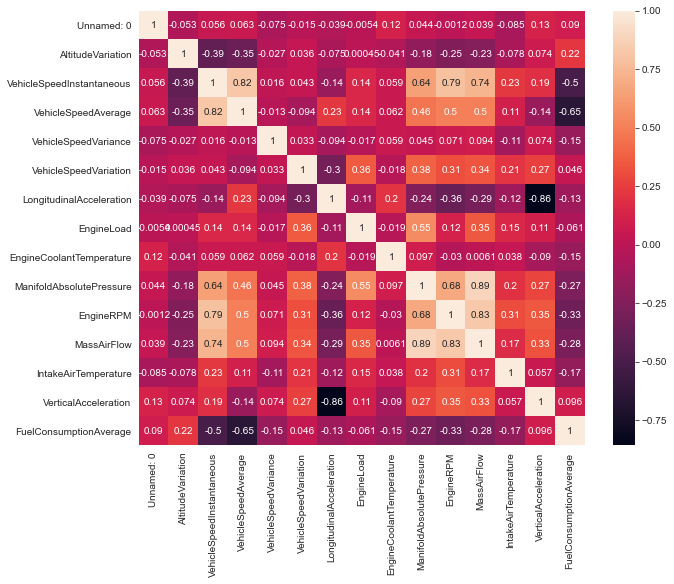

In [22]:
corr_heatmap(df1)

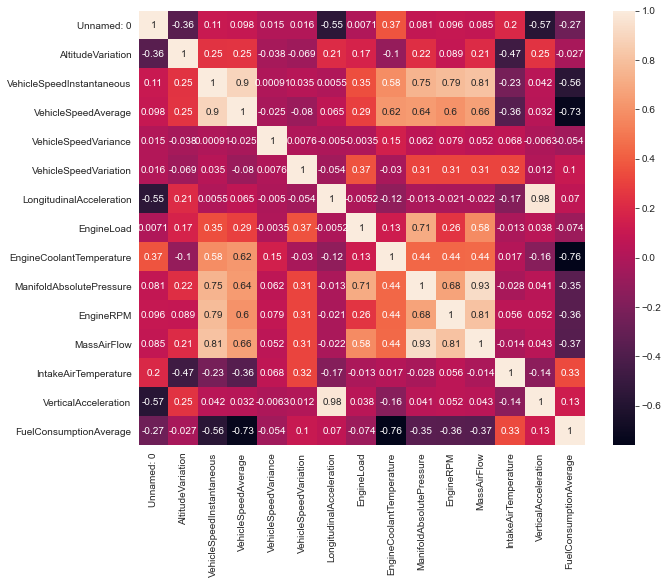

In [23]:
corr_heatmap(df2)

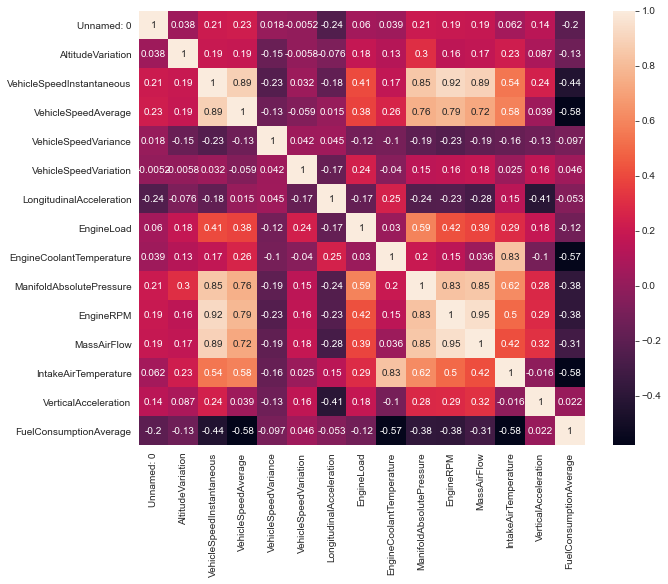

In [24]:
corr_heatmap(df3)

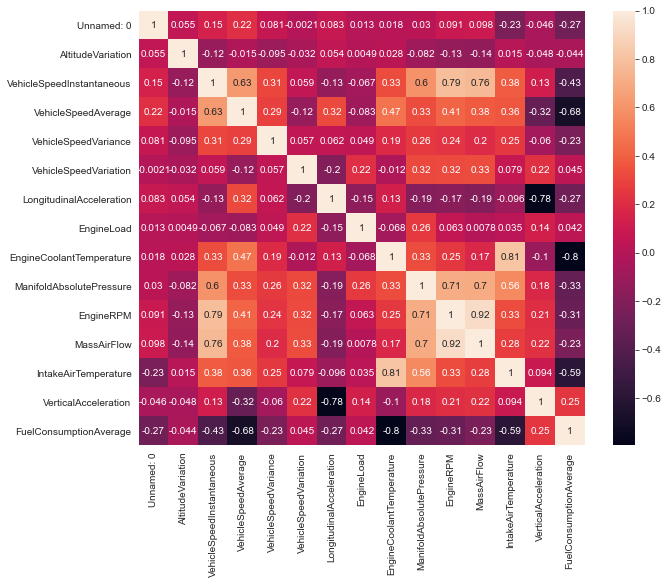

In [25]:
corr_heatmap(df4)

Some initial observations:

- While there are some patterns across datasets, there is also a lot of variation between them, and a very positive correlation in one dataset may be insignificant in another or it may be a strong negative correlation in a different dataset.


- Unsurprisingly, there is a very strong relation between `VehicleSpeedInstantaneous` and `VehicleSpeedAverage` - although this relationship is not so strong for the peugeot_02 dataset. 


- `ManifoldAbsolutePressure`, `EngineRPM` and `MassAirFlow` are strongly correlated with each other and with `VehicleSpeedInstantaneous` and `VehicleSpeedAverage` in all datasets.


- `FuelConsumptionAverage` is negatively correlated with `VehicleSpeedAverage` in all datasets,  and it it also has a significant negative correlation with `EngineCoolantTemperature` and `IntakeAirTemperature` in the peugeot datasets. 


- There is a strong negative correlation between `LongitudinalAcceleration` and `VerticalAcceleration` in opel_01 and peugeot_02, however they are extremely positively correlated in the opel_02 dataset.

#### Distribution of numerical variables
Now let's have a look at the distribution of the numerical variables in each dataset.

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'AltitudeVariation'}>,
        <AxesSubplot:title={'center':'VehicleSpeedInstantaneous'}>,
        <AxesSubplot:title={'center':'VehicleSpeedAverage'}>],
       [<AxesSubplot:title={'center':'VehicleSpeedVariance'}>,
        <AxesSubplot:title={'center':'VehicleSpeedVariation'}>,
        <AxesSubplot:title={'center':'LongitudinalAcceleration'}>,
        <AxesSubplot:title={'center':'EngineLoad'}>],
       [<AxesSubplot:title={'center':'EngineCoolantTemperature'}>,
        <AxesSubplot:title={'center':'ManifoldAbsolutePressure'}>,
        <AxesSubplot:title={'center':'EngineRPM'}>,
        <AxesSubplot:title={'center':'MassAirFlow'}>],
       [<AxesSubplot:title={'center':'IntakeAirTemperature'}>,
        <AxesSubplot:title={'center':'VerticalAcceleration'}>,
        <AxesSubplot:title={'center':'FuelConsumptionAverage'}>,
        <AxesSubplot:>]], dtype=object)

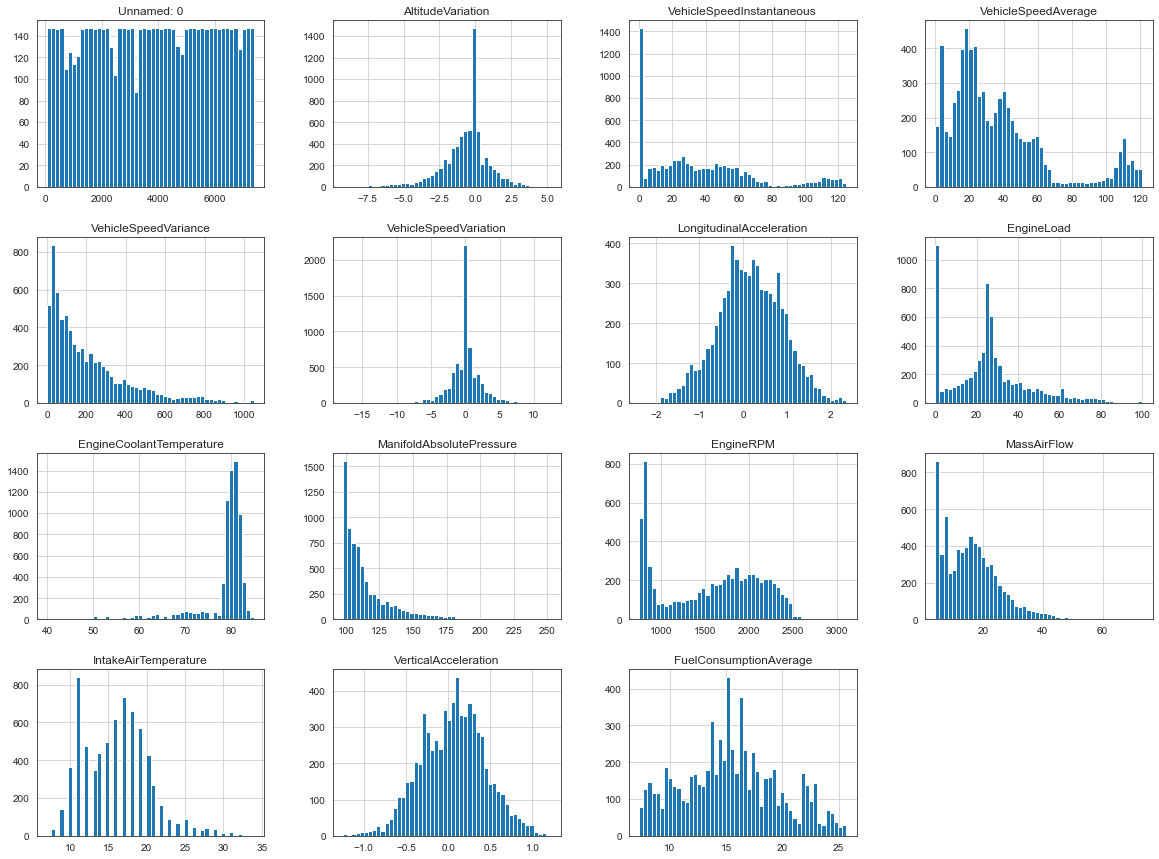

In [26]:
df1.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'AltitudeVariation'}>,
        <AxesSubplot:title={'center':'VehicleSpeedInstantaneous'}>,
        <AxesSubplot:title={'center':'VehicleSpeedAverage'}>],
       [<AxesSubplot:title={'center':'VehicleSpeedVariance'}>,
        <AxesSubplot:title={'center':'VehicleSpeedVariation'}>,
        <AxesSubplot:title={'center':'LongitudinalAcceleration'}>,
        <AxesSubplot:title={'center':'EngineLoad'}>],
       [<AxesSubplot:title={'center':'EngineCoolantTemperature'}>,
        <AxesSubplot:title={'center':'ManifoldAbsolutePressure'}>,
        <AxesSubplot:title={'center':'EngineRPM'}>,
        <AxesSubplot:title={'center':'MassAirFlow'}>],
       [<AxesSubplot:title={'center':'IntakeAirTemperature'}>,
        <AxesSubplot:title={'center':'VerticalAcceleration'}>,
        <AxesSubplot:title={'center':'FuelConsumptionAverage'}>,
        <AxesSubplot:>]], dtype=object)

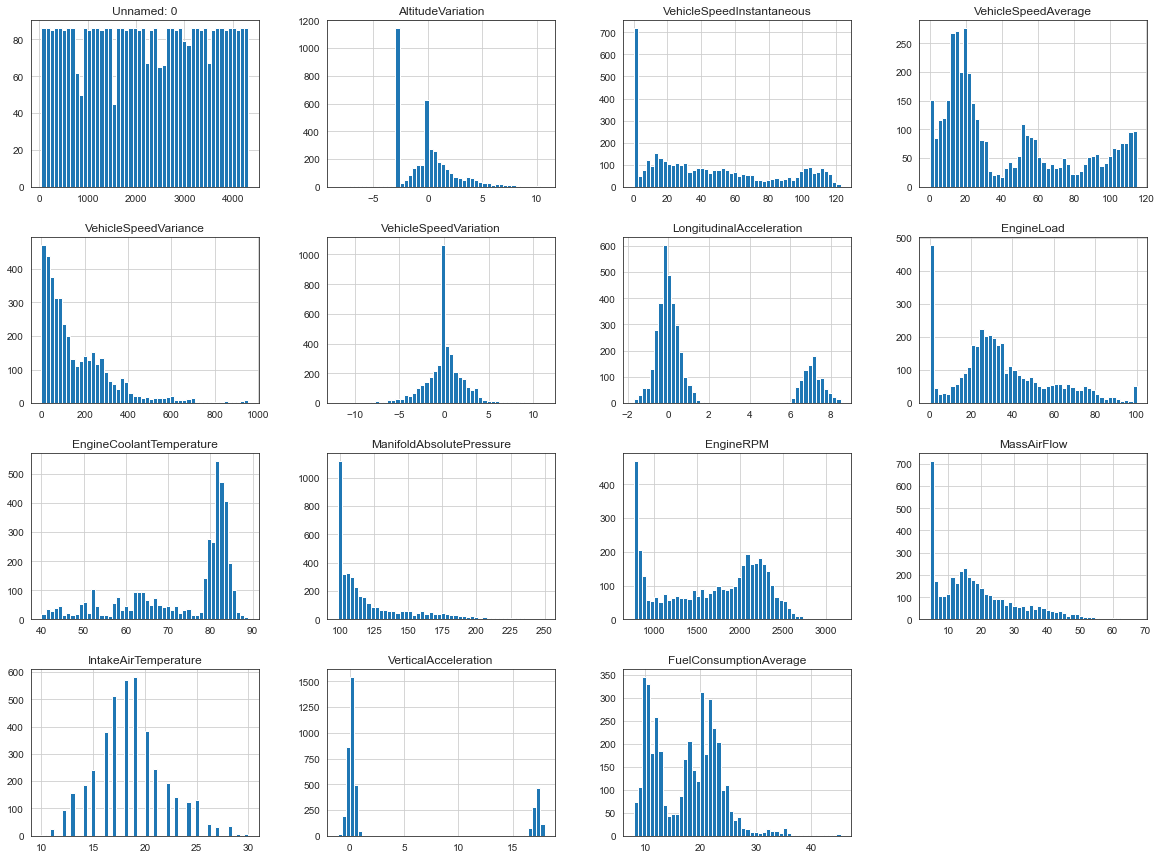

In [27]:
df2.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'AltitudeVariation'}>,
        <AxesSubplot:title={'center':'VehicleSpeedInstantaneous'}>,
        <AxesSubplot:title={'center':'VehicleSpeedAverage'}>],
       [<AxesSubplot:title={'center':'VehicleSpeedVariance'}>,
        <AxesSubplot:title={'center':'VehicleSpeedVariation'}>,
        <AxesSubplot:title={'center':'LongitudinalAcceleration'}>,
        <AxesSubplot:title={'center':'EngineLoad'}>],
       [<AxesSubplot:title={'center':'EngineCoolantTemperature'}>,
        <AxesSubplot:title={'center':'ManifoldAbsolutePressure'}>,
        <AxesSubplot:title={'center':'EngineRPM'}>,
        <AxesSubplot:title={'center':'MassAirFlow'}>],
       [<AxesSubplot:title={'center':'IntakeAirTemperature'}>,
        <AxesSubplot:title={'center':'VerticalAcceleration'}>,
        <AxesSubplot:title={'center':'FuelConsumptionAverage'}>,
        <AxesSubplot:>]], dtype=object)

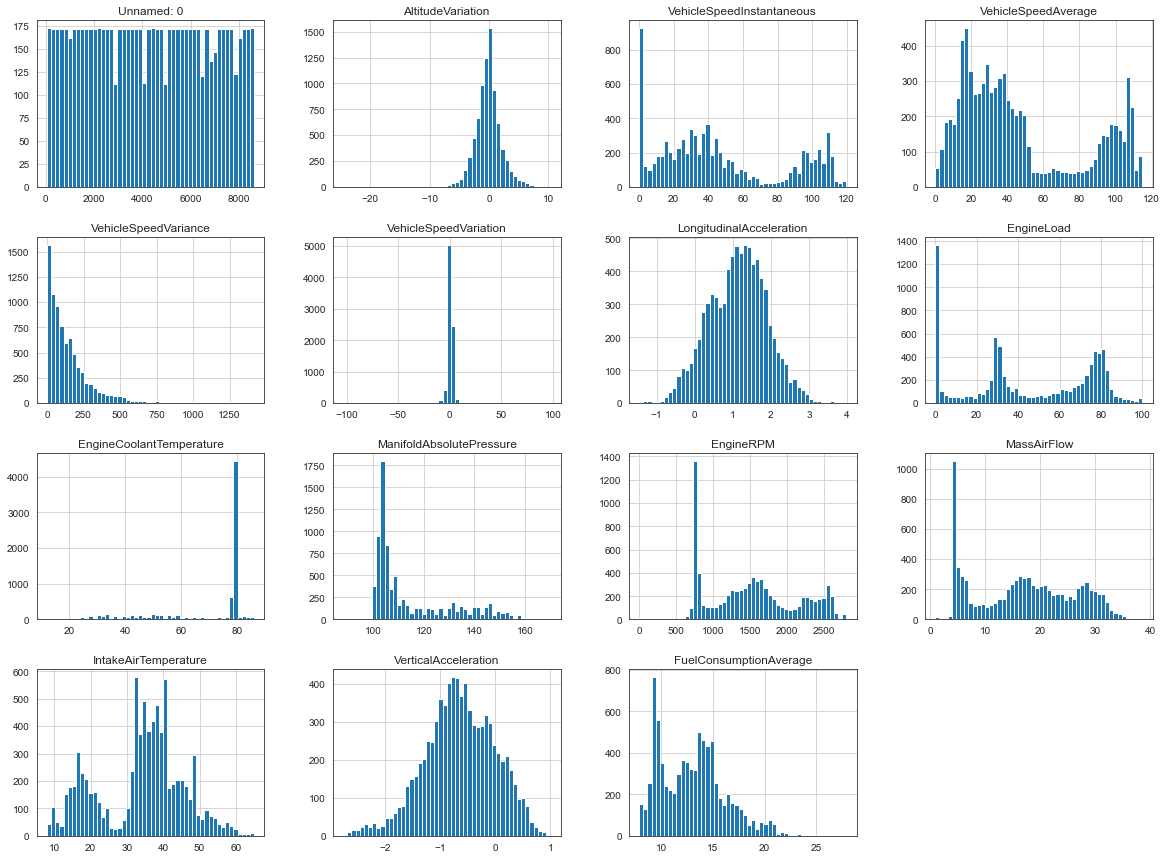

In [28]:
df3.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'AltitudeVariation'}>,
        <AxesSubplot:title={'center':'VehicleSpeedInstantaneous'}>,
        <AxesSubplot:title={'center':'VehicleSpeedAverage'}>],
       [<AxesSubplot:title={'center':'VehicleSpeedVariance'}>,
        <AxesSubplot:title={'center':'VehicleSpeedVariation'}>,
        <AxesSubplot:title={'center':'LongitudinalAcceleration'}>,
        <AxesSubplot:title={'center':'EngineLoad'}>],
       [<AxesSubplot:title={'center':'EngineCoolantTemperature'}>,
        <AxesSubplot:title={'center':'ManifoldAbsolutePressure'}>,
        <AxesSubplot:title={'center':'EngineRPM'}>,
        <AxesSubplot:title={'center':'MassAirFlow'}>],
       [<AxesSubplot:title={'center':'IntakeAirTemperature'}>,
        <AxesSubplot:title={'center':'VerticalAcceleration'}>,
        <AxesSubplot:title={'center':'FuelConsumptionAverage'}>,
        <AxesSubplot:>]], dtype=object)

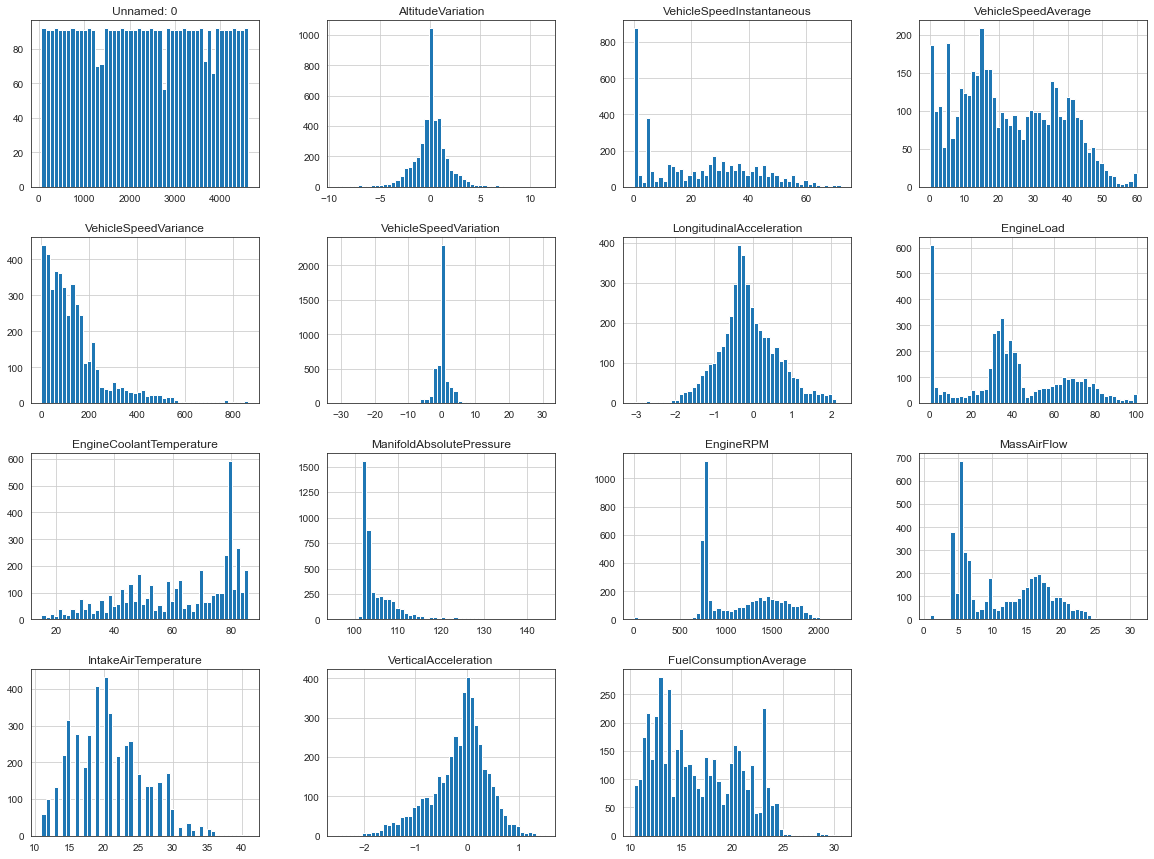

In [29]:
df4.hist(bins=50, figsize=(20,15))

For each dataset, the graphs for `VehicleSpeedInstantaneous`, `VehicleSpeedVariance`, `ManifoldAbsolutePressure`, `EngineRPM` and `MassAirFlow` are really right-skewed, while `EngineCoolantTemperature` has a long right tail in each of the datasets. We may need to do log transformations on these variables to try create more normal distributions.

There are also some variables which seem to have different distributions across the datasets, we can compare these side-by-side to have a better look.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'Power Transformed ManifoldAbsolutePressure')

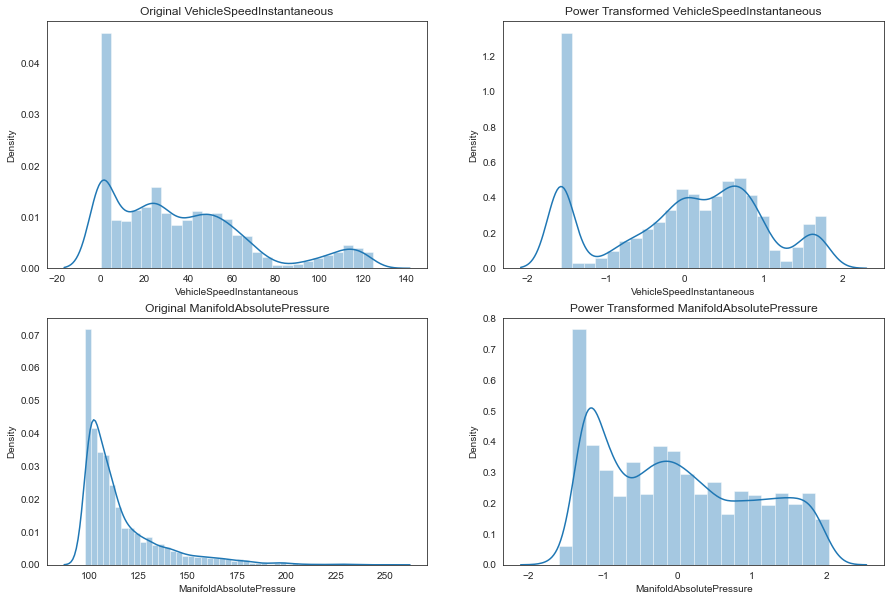

In [30]:
# testing out sklearn's PowerTransformer on two variables 

from sklearn.preprocessing import PowerTransformer

df1_transformed = df1.copy()
pt = PowerTransformer()
df1_transformed[["ManifoldAbsolutePressure", "VehicleSpeedInstantaneous"]] = pt.fit_transform(df1_transformed[["ManifoldAbsolutePressure", "VehicleSpeedInstantaneous"]])


figure, axis = plt.subplots(2, 2, figsize=(15,10))

sns.distplot(df1["VehicleSpeedInstantaneous"], ax=axis[0, 0])
axis[0, 0].set_title("Original VehicleSpeedInstantaneous")

sns.distplot(df1_transformed["VehicleSpeedInstantaneous"], ax=axis[0, 1])
axis[0, 1].set_title("Power Transformed VehicleSpeedInstantaneous")

sns.distplot(df1["ManifoldAbsolutePressure"], ax=axis[1, 0])
axis[1, 0].set_title("Original ManifoldAbsolutePressure")

sns.distplot(df1_transformed["ManifoldAbsolutePressure"], ax=axis[1, 1])
axis[1, 1].set_title("Power Transformed ManifoldAbsolutePressure")


Realized after I tried these transformations that it probably didn't work very well on the vehicle speed because it has a lot of zero values so it is not suitable for this type of transformation.

There is a clear difference in the shape of the distribution for `VerticalAcceleration` and `LongitudinalAcceleration` between the opel_02 dataset and the others. Let's take a closer look.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

[0.0, 1.4, 0.0, 1.4, 0.0, 1.4, 0.0, 1.4]

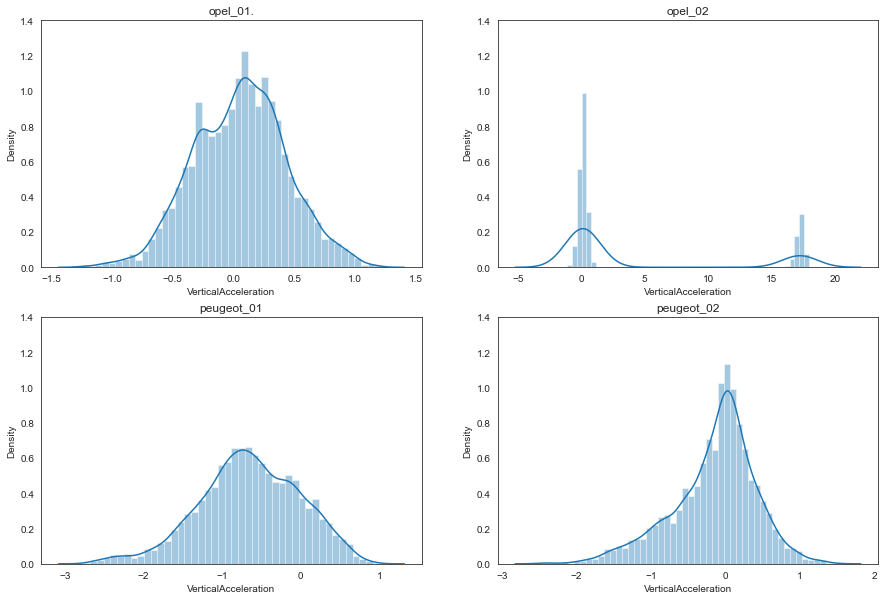

In [31]:
figure, axis = plt.subplots(2, 2, figsize=(15,10))

column = 'VerticalAcceleration' 

sns.distplot(df1[column], ax=axis[0, 0])
axis[0, 0].set_title(df1.dataframeName)

sns.distplot(df2[column], ax=axis[0, 1])
axis[0, 1].set_title(df2.dataframeName)
  
sns.distplot(df3[column], ax=axis[1, 0])
axis[1, 0].set_title(df3.dataframeName)
  
sns.distplot(df4[column], ax=axis[1, 1])
axis[1, 1].set_title(df4.dataframeName)

plt.setp(axis, ylim=(0,1.4))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

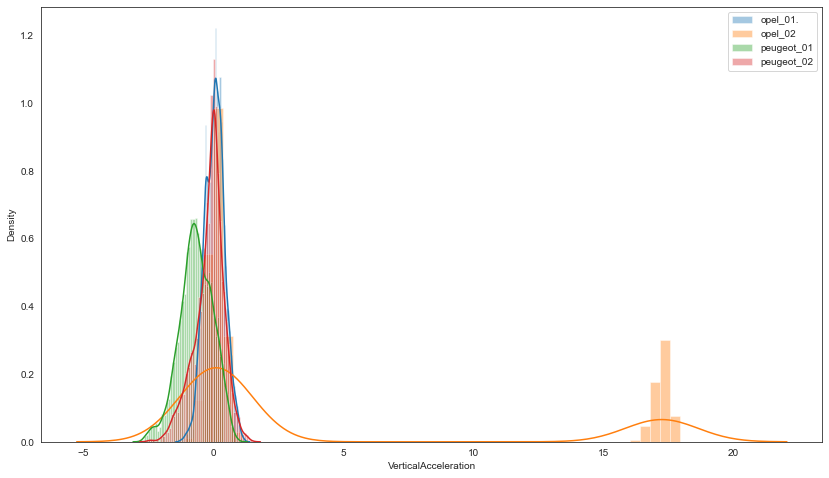

In [32]:
column = 'VerticalAcceleration'

plt.figure(figsize=(14,8))

for df in df_list:
    sns.distplot(df[column], label=df.dataframeName)

plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

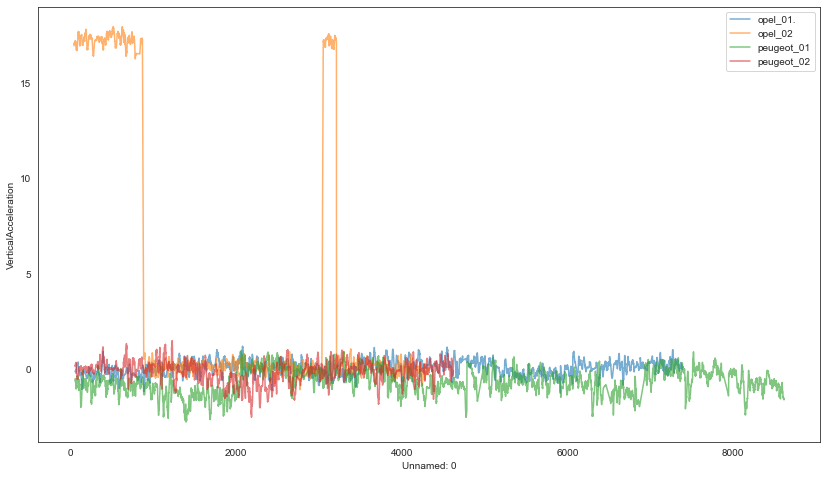

In [33]:
column = 'VerticalAcceleration'

plt.figure(figsize=(14,8))

for df in df_list:
    sns.lineplot(df['Unnamed: 0'], df[column], label=df.dataframeName, alpha=0.6)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

[0.0, 0.9, 0.0, 0.9, 0.0, 0.9, 0.0, 0.9]

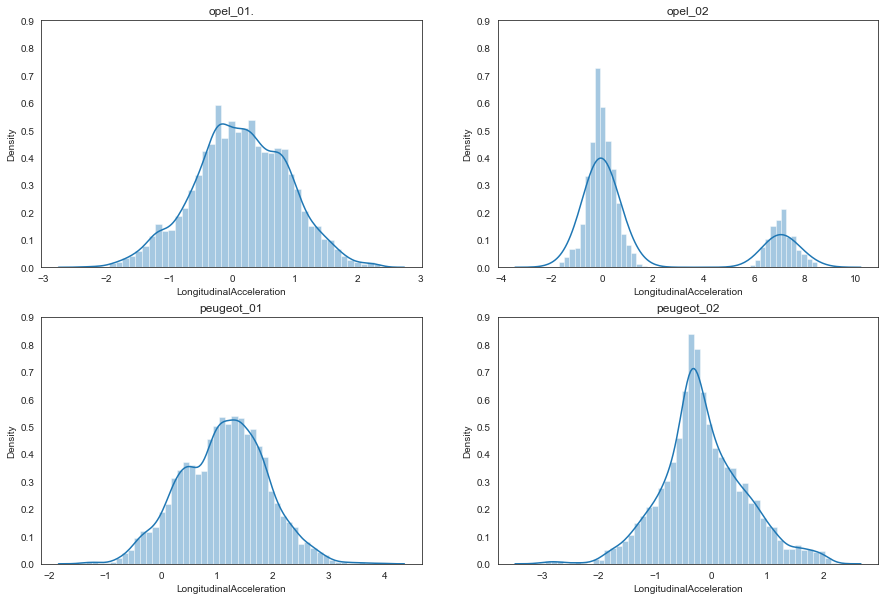

In [34]:
figure, axis = plt.subplots(2, 2, figsize=(15,10))

column = 'LongitudinalAcceleration' 

sns.distplot(df1[column], ax=axis[0, 0])
axis[0, 0].set_title(df1.dataframeName)
  
sns.distplot(df2[column], ax=axis[0, 1])
axis[0, 1].set_title(df2.dataframeName)
  
sns.distplot(df3[column], ax=axis[1, 0])
axis[1, 0].set_title(df3.dataframeName)
  
sns.distplot(df4[column], ax=axis[1, 1])
axis[1, 1].set_title(df4.dataframeName)

plt.setp(axis, ylim=(0,0.9))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

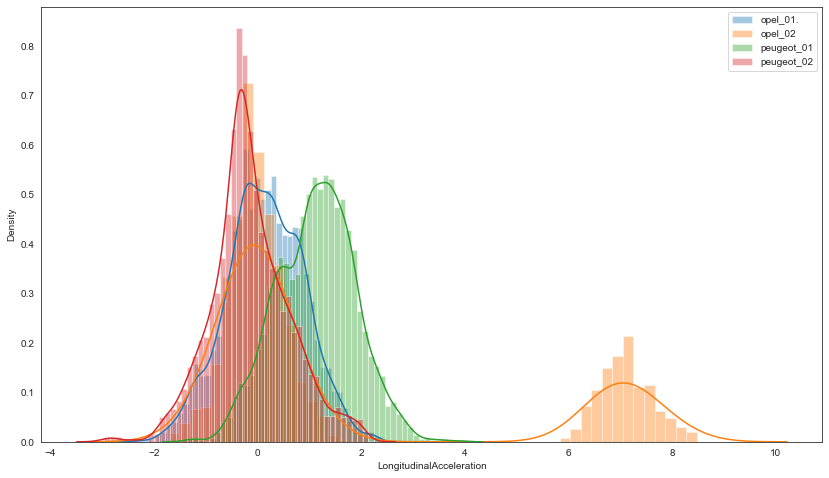

In [35]:
plt.figure(figsize=(14,8))

for df in df_list:
    sns.distplot(df[column], label=df.dataframeName)

plt.legend()

In [36]:
df2.describe()

Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
count  4092.000000        4092.000000                4092.000000   
mean   2198.175953          -0.139590                  43.482246   
std    1248.536624           2.484872                  37.543881   
min      44.000000          -8.299988                   0.000000   
25%    1125.750000          -2.800003                  11.259000   
50%    2188.500000           0.000000                  34.452538   
75%    3285.250000           1.024994                  70.312449   
max    4327.000000          10.700012                 122.723091   

       VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
count          4092.000000           4092.000000            4092.000000   
mean             43.419217            162.980180              -0.011556   
std              35.323457            162.805408               2.227681   
min               0.000000              0.000000             -11.934539   
25%              14.868447             42.682230              -0.900719   
50%              26.422996            106.038210               0.000000   
75%              70.051620            240.313896               0.900722   
max             114.706688            956.695096              11.259000   

       LongitudinalAcceleration   EngineLoad  EngineCoolantTemperature  \
count               4092.000000  4092.000000               4092.000000   
mean                   1.603635    34.509613                 73.378299   
std                    3.057510    23.559170                 12.875391   
min                   -1.710800     0.000000                 40.000000   
25%                   -0.254950    20.000000                 64.000000   
50%                    0.125000    30.588236                 80.000000   
75%                    1.060000    47.843140                 83.000000   
max                    8.477800   100.000000                 89.000000   

       ManifoldAbsolutePressure    EngineRPM  MassAirFlow  \
count               4092.000000  4092.000000  4092.000000   
mean                 123.764907  1656.040811    18.608326   
std                   30.908416   575.566227    12.334384   
min                   98.000000   760.000000     4.270000   
25%                  101.000000  1087.000000     8.445000   
50%                  110.000000  1762.500000    15.820000   
75%                  136.000000  2156.000000    25.330000   
max                  250.000000  3167.000000    67.309998   

       IntakeAirTemperature  VerticalAcceleration  FuelConsumptionAverage  
count           4092.000000           4092.000000             4092.000000  
mean              18.521261              4.061078               17.400087  
std                3.408300              7.221253                5.970610  
min               10.000000             -1.140000                7.929113  
25%               16.000000             -0.007800               11.634232  
50%               18.000000              0.223000               18.079138  
75%               20.000000              0.716000               21.760530  
max               30.000000             17.944800               45.336861

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

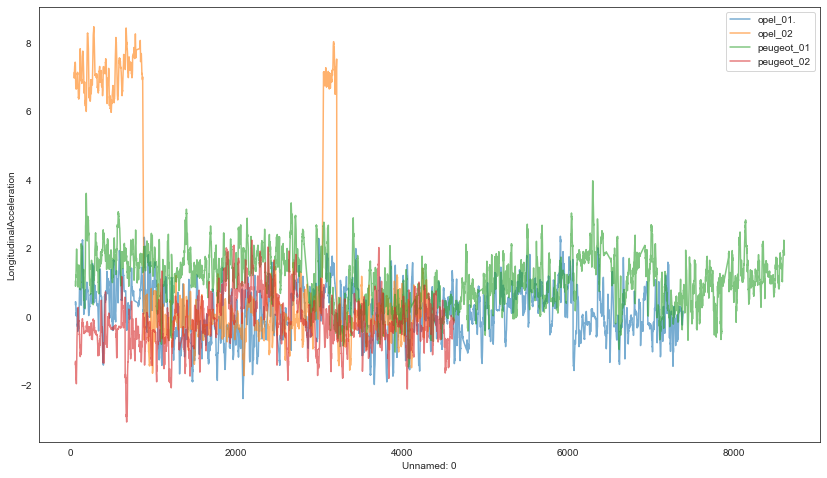

In [37]:
plt.figure(figsize=(14,8))

for df in df_list:
    sns.lineplot(df['Unnamed: 0'], df[column], label=df.dataframeName, alpha=0.6)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

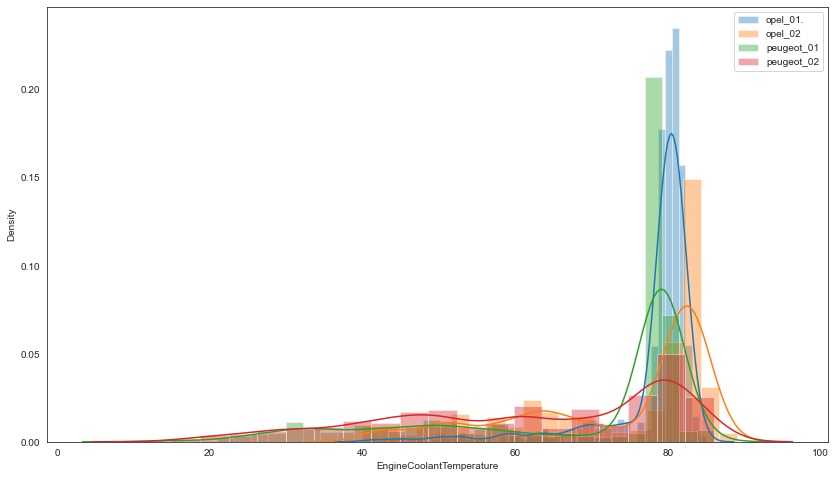

In [38]:
column = 'EngineCoolantTemperature'

plt.figure(figsize=(14,8))

for df in df_list:
    sns.distplot(df[column], label=df.dataframeName)

plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

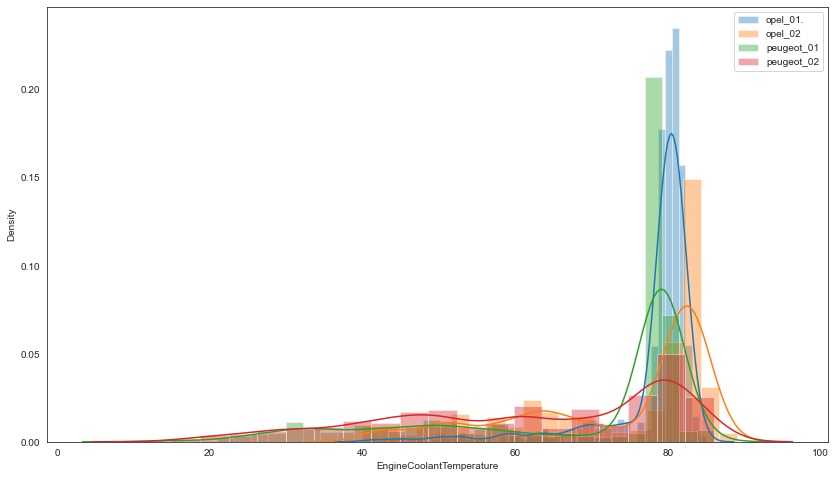

In [39]:
column = 'EngineCoolantTemperature'

plt.figure(figsize=(14,8))

for df in df_list:
    sns.distplot(df[column], label=df.dataframeName)

plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

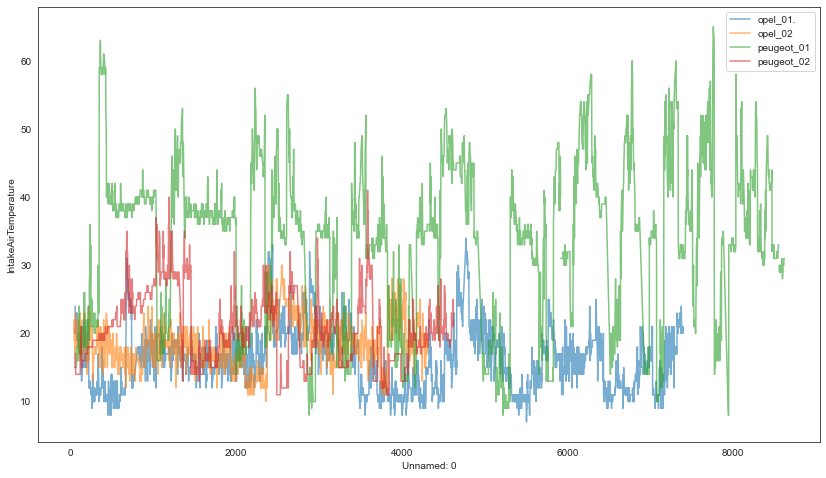

In [40]:
column = 'IntakeAirTemperature'

plt.figure(figsize=(14,8))

for df in df_list:
    sns.lineplot(df['Unnamed: 0'], df[column], label=df.dataframeName, alpha=0.6)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

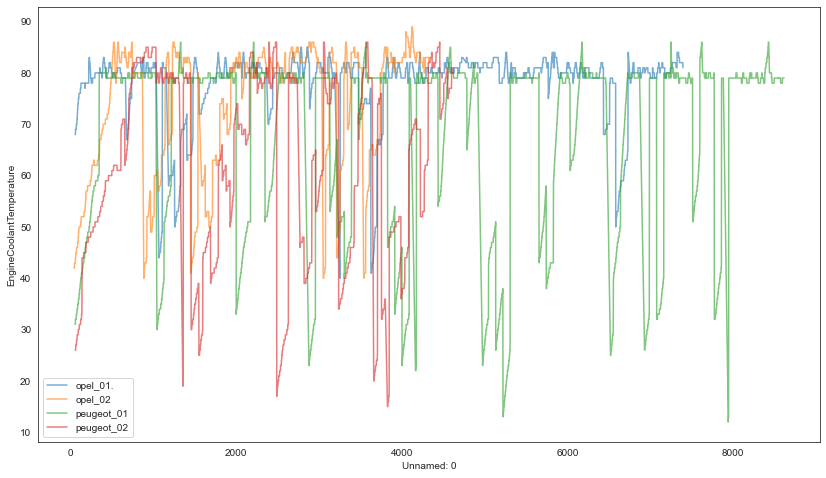

In [41]:
column = 'EngineCoolantTemperature'

plt.figure(figsize=(14,8))

for df in df_list:
    sns.lineplot(df['Unnamed: 0'], df[column], label=df.dataframeName, alpha=0.6)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

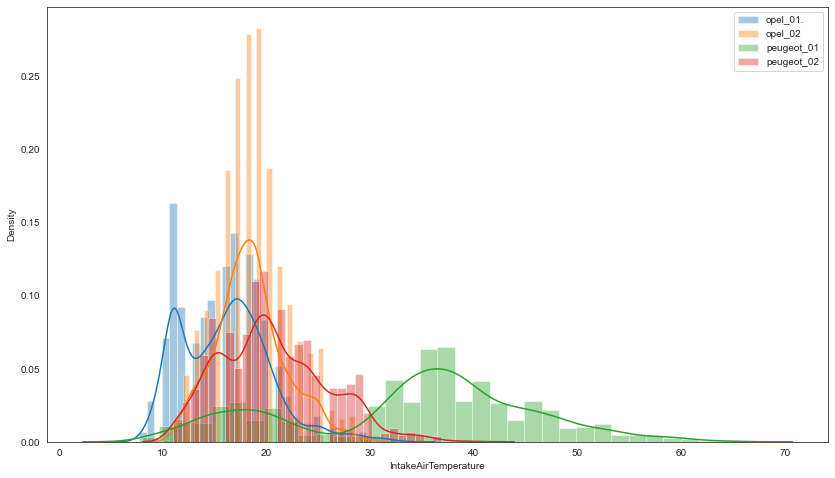

In [42]:
column = 'IntakeAirTemperature'

plt.figure(figsize=(14,8))

for df in df_list:
    sns.distplot(df[column], label=df.dataframeName)

plt.legend()

#### Comparing the distribution of categorical variables in each dataset.

In [43]:
def get_class_proportions(df, category):
   print("\n", df.dataframeName, ":")
   for i in range(len(list(df[category].unique()))):
        print(df[category].unique()[i])
        print(df[category].value_counts()[i], "-", round((df[category].value_counts()[i])/df.shape[0]*100, 2),"%")       

In [44]:
category = 'drivingStyle'

for df in df_list:
    get_class_proportions(df, category)


 opel_01. :
EvenPaceStyle
5751 - 81.71 %
AggressiveStyle
1287 - 18.29 %

 opel_02 :
EvenPaceStyle
3290 - 80.4 %
AggressiveStyle
802 - 19.6 %

 peugeot_01 :
EvenPaceStyle
7716 - 94.11 %
AggressiveStyle
483 - 5.89 %

 peugeot_02 :
EvenPaceStyle
4259 - 95.79 %
AggressiveStyle
187 - 4.21 %


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

Text(0.5, 1.0, 'peugeot_02')

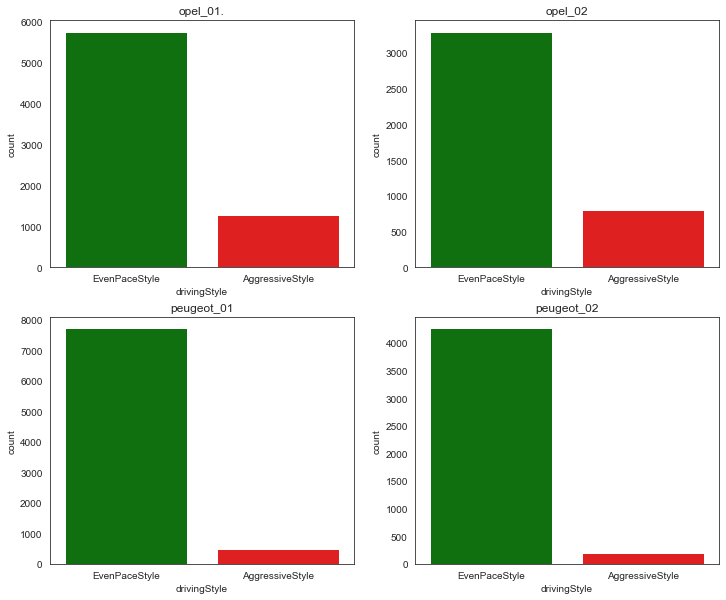

In [45]:
figure, axis = plt.subplots(2, 2, figsize=(12,10))

palette_dict = dict(EvenPaceStyle="g", AggressiveStyle="r")

sns.countplot(df1[category], palette=palette_dict, ax=axis[0, 0])
axis[0, 0].set_title(df1.dataframeName)
  
sns.countplot(df2[category], palette=palette_dict, ax=axis[0, 1])
axis[0, 1].set_title(df2.dataframeName)
  
sns.countplot(df3[category], palette=palette_dict, ax=axis[1, 0])
axis[1, 0].set_title(df3.dataframeName)
  
sns.countplot(df4[category], palette=palette_dict, ax=axis[1, 1])
axis[1, 1].set_title(df4.dataframeName)

In general, the distribution of driving styles in each dataset seems to be quite similar.

Now let's look at the `roadSurface`.

In [46]:
category = 'roadSurface'

for df in df_list:
    get_class_proportions(df, category)


 opel_01. :
SmoothCondition
6873 - 97.66 %
UnevenCondition
165 - 2.34 %

 opel_02 :
SmoothCondition
3812 - 93.16 %
UnevenCondition
280 - 6.84 %

 peugeot_01 :
SmoothCondition
3274 - 39.93 %
FullOfHolesCondition
3042 - 37.1 %
UnevenCondition
1883 - 22.97 %

 peugeot_02 :
UnevenCondition
2802 - 63.02 %
FullOfHolesCondition
1366 - 30.72 %
SmoothCondition
278 - 6.25 %


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

Text(0.5, 1.0, 'peugeot_02')

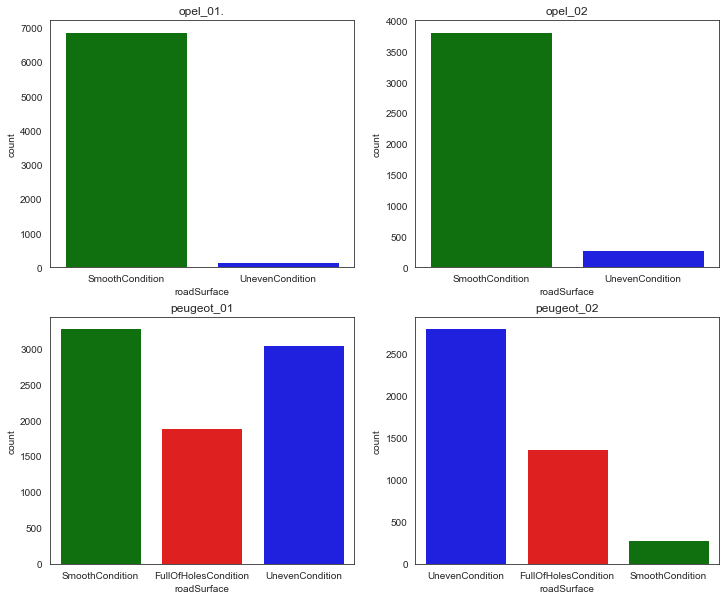

In [47]:
figure, axis = plt.subplots(2, 2, figsize=(12,10))

palette_dict = dict(SmoothCondition="g", UnevenCondition="b", FullOfHolesCondition="r")

sns.countplot(df1[category], palette=palette_dict, ax=axis[0, 0])
axis[0, 0].set_title(df1.dataframeName)
  
sns.countplot(df2[category], palette=palette_dict, ax=axis[0, 1])
axis[0, 1].set_title(df2.dataframeName)
  
sns.countplot(df3[category], palette=palette_dict, ax=axis[1, 0])
axis[1, 0].set_title(df3.dataframeName)
  
sns.countplot(df4[category], palette=palette_dict, ax=axis[1, 1])
axis[1, 1].set_title(df4.dataframeName)

From the statistics and charts above we see there is a big inbalance in the datasets for this target class. While the Opel trips were driven on mostly smooth roads, the two Peugeot trips were on considerably worst road surfaces, especially the second Peugeot trip where only 6% on the roads were in a smooth condition. This big inbalance in this category might not make it the most suitable target class to choose to predict. 

The last target class we will compare is `traffic`.

In [48]:
traffic_conditions = {'LowCongestionCondition':'Low', 'NormalCongestionCondition':'Medium',
                      'HighCongestionCondition':'High'}

df1.traffic = df1.traffic.map(traffic_conditions)
df2.traffic = df2.traffic.map(traffic_conditions)
df3.traffic = df3.traffic.map(traffic_conditions)
df4.traffic = df4.traffic.map(traffic_conditions)

In [49]:
category = 'traffic'

for df in df_list:
    get_class_proportions(df, category)


 opel_01. :
Low
6461 - 91.8 %
Medium
449 - 6.38 %
High
128 - 1.82 %

 opel_02 :
Low
3591 - 87.76 %
High
405 - 9.9 %
Medium
96 - 2.35 %

 peugeot_01 :
LowCongestionCondition
6844 - 83.47 %
NormalCongestionCondition
696 - 8.49 %
HighCongestionCondition
659 - 8.04 %

 peugeot_02 :
NormalCongestionCondition
1813 - 40.78 %
HighCongestionCondition
1765 - 39.7 %
LowCongestionCondition
868 - 19.52 %


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

Text(0.5, 1.0, 'peugeot_02')

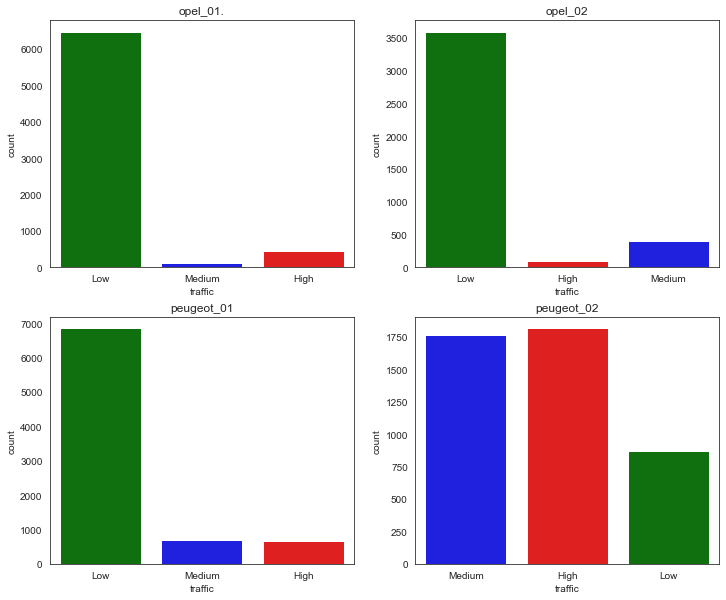

In [51]:
figure, axis = plt.subplots(2, 2, figsize=(12,10))

palette_dict = dict(Low="g", Medium="b", High="r")

sns.countplot(df1[category], palette=palette_dict, ax=axis[0, 0])
axis[0, 0].set_title(df1.dataframeName)
  
sns.countplot(df2[category], palette=palette_dict, ax=axis[0, 1])
axis[0, 1].set_title(df2.dataframeName)
  
sns.countplot(df3[category], palette=palette_dict, ax=axis[1, 0])
axis[1, 0].set_title(df3.dataframeName)
  
sns.countplot(df4[category], palette=palette_dict, ax=axis[1, 1])
axis[1, 1].set_title(df4.dataframeName)

While the traffic congestion conditions for the first three datasets are quite similar, there was clearly much more congestion during the last trip. Let's visualize the vehicle speed during the different trips to see if if the high traffic for trip 4 is noticable.

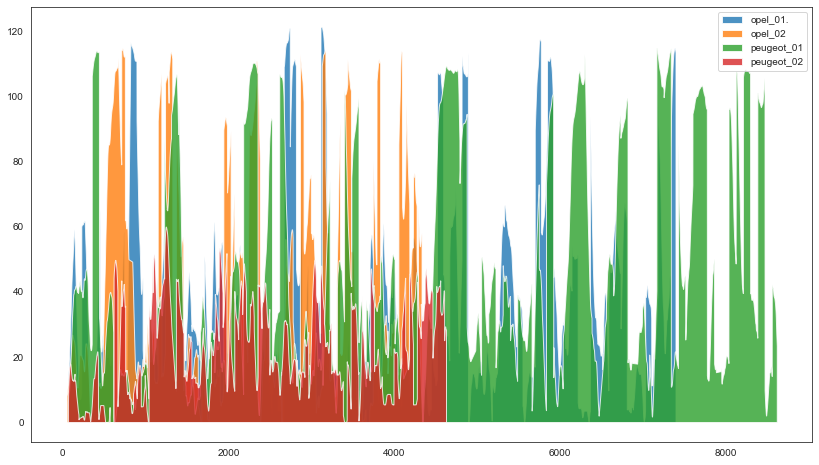

In [52]:
plt.figure(figsize=(14,8))

for df in df_list:
    plt.fill_between(df['Unnamed: 0'], df['VehicleSpeedAverage'], label=df.dataframeName, alpha=0.8)

plt.legend()

Text(0.5, 1.0, 'peugeot_02')

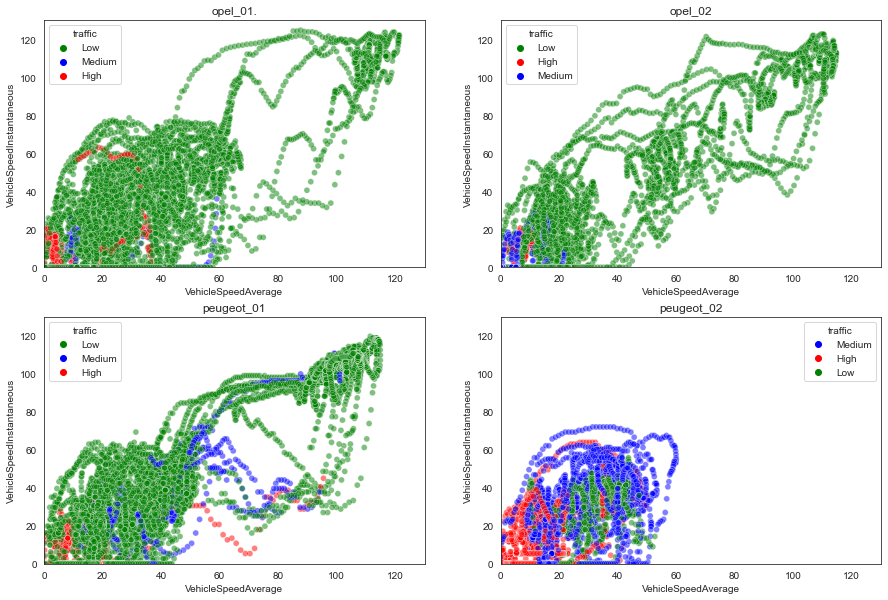

In [54]:
figure, axis = plt.subplots(2, 2, figsize=(15,10))

y_column = 'VehicleSpeedInstantaneous'
x_column = 'VehicleSpeedAverage'

plt.setp(axis, ylim=(0,130), xlim=(0,130))

sns.scatterplot(x=x_column, y=y_column, data=df1, alpha=0.5, hue='traffic', 
                palette=palette_dict, ax=axis[0,0])
axis[0, 0].set_title(df1.dataframeName)

sns.scatterplot(x=x_column, y=y_column, data=df2, alpha=0.5, hue='traffic', 
                palette=palette_dict, ax=axis[0,1])
axis[0, 1].set_title(df2.dataframeName)

sns.scatterplot(x=x_column, y=y_column, data=df3, alpha=0.5, hue='traffic', 
                palette=palette_dict, ax=axis[1,0])
axis[1, 0].set_title(df3.dataframeName)

sns.scatterplot(x=x_column, y=y_column, data=df4, alpha=0.5, hue='traffic', 
               palette=palette_dict, ax=axis[1,1])
axis[1, 1].set_title(df4.dataframeName)


From these charts we can see that when there is mainly low traffic congestion the vehicle can go at greater speeds, but during trip 4 there was too much medium to high traffic congestion to allow the vehicle to reach higher speeds.  

So we can make an assumption that once the speed goes over a certain threshold, there is a higher probability that there is low traffic.

Let's see if it's the same for road surface, do higher speeds indicate that the road surface was probably in a better condition?

Text(0.5, 1.0, 'peugeot_02')

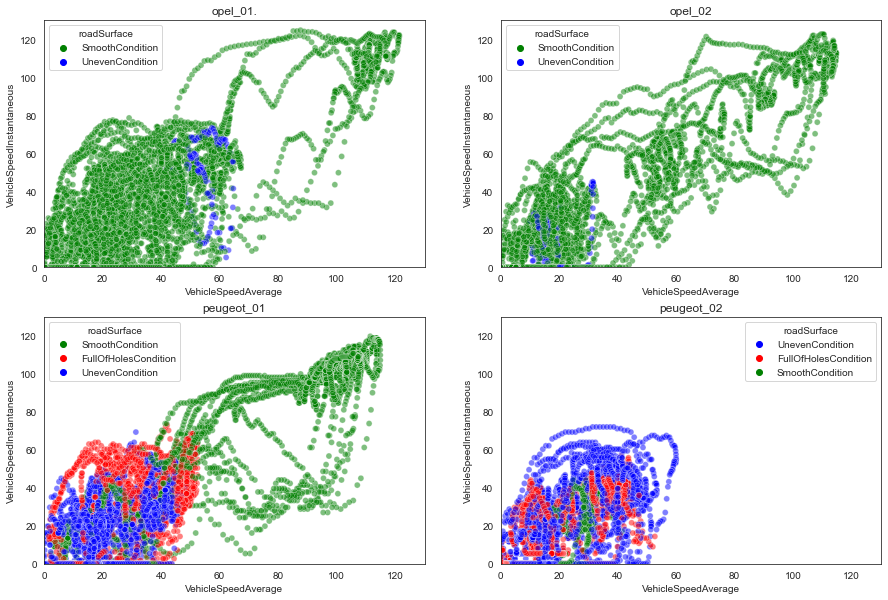

In [69]:
figure, axis = plt.subplots(2, 2, figsize=(15,10))

palette_dict = dict(SmoothCondition="g", UnevenCondition="b", FullOfHolesCondition="r")

y_column = 'VehicleSpeedInstantaneous'
x_column = 'VehicleSpeedAverage'

plt.setp(axis, ylim=(0,130), xlim=(0,130))

sns.scatterplot(x=x_column, y=y_column, data=df1, alpha=0.5, hue='roadSurface', 
                palette=palette_dict, ax=axis[0,0])
axis[0, 0].set_title(df1.dataframeName)

sns.scatterplot(x=x_column, y=y_column, data=df2, alpha=0.5, hue='roadSurface', 
                palette=palette_dict, ax=axis[0,1])
axis[0, 1].set_title(df2.dataframeName)

sns.scatterplot(x=x_column, y=y_column, data=df3, alpha=0.5, hue='roadSurface', 
                palette=palette_dict, ax=axis[1,0])
axis[1, 0].set_title(df3.dataframeName)

sns.scatterplot(x=x_column, y=y_column, data=df4, alpha=0.5, hue='roadSurface', 
               palette=palette_dict, ax=axis[1,1])
axis[1, 1].set_title(df4.dataframeName)


In the first 2 trips, high speeds seem to go hand-in-hand with smooth roads, but in the third trip (peugeot_01) there were slightly higher speeds when the road was full of holes compared to just an uneven condition, and for the fourth trip (peugeot_02) higher speeds were reached on both roads with uneven condition and roads full of holes, compared to smooth roads, so maybe speed isn't quite as reliable as a predictor for road surface condition as it is for traffic congestion. 

Now let's use one-hot encoding to turn the categories into numerical values and further explore how they are correlated to the other variables using correlation matrices and heatmaps.

In [55]:
df1_dummies = pd.get_dummies(df1)
df2_dummies = pd.get_dummies(df2)
df3_dummies = pd.get_dummies(df3)
df4_dummies = pd.get_dummies(df4)

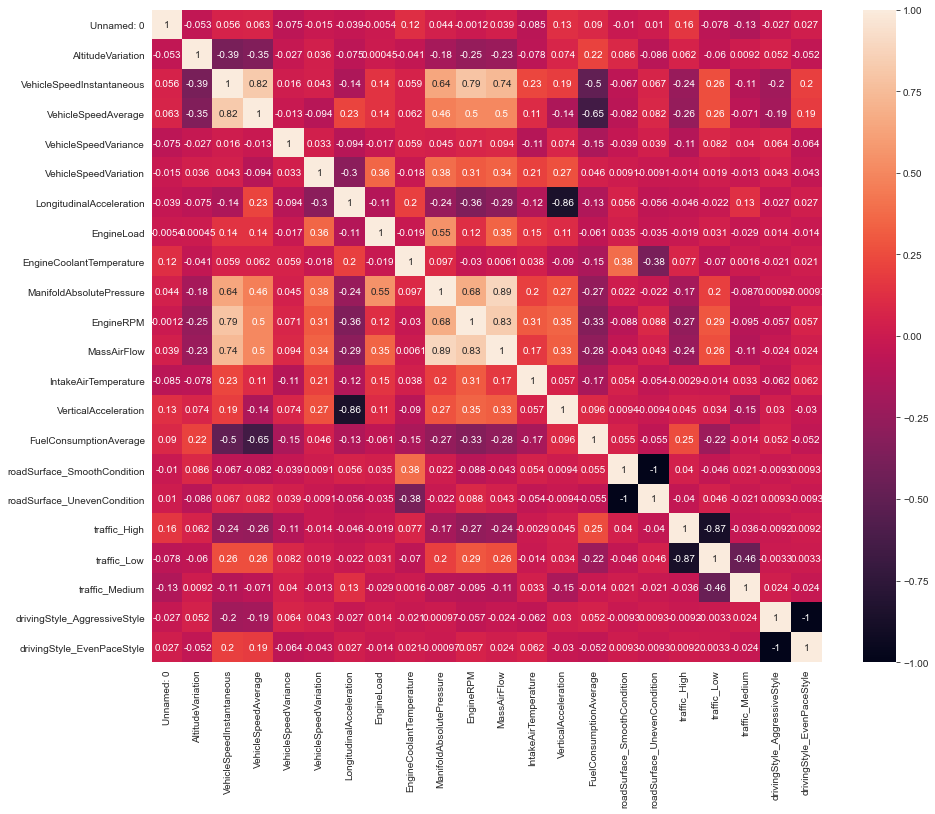

In [56]:
corr_heatmap(df1_dummies,15,12)

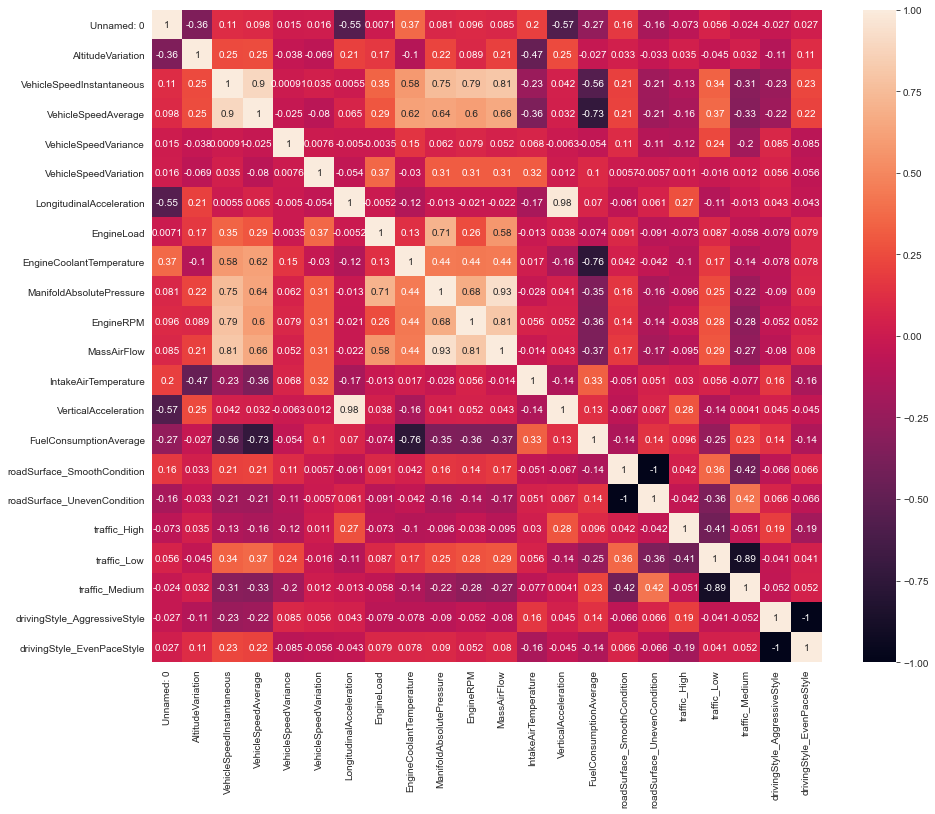

In [57]:
corr_heatmap(df2_dummies,15,12)

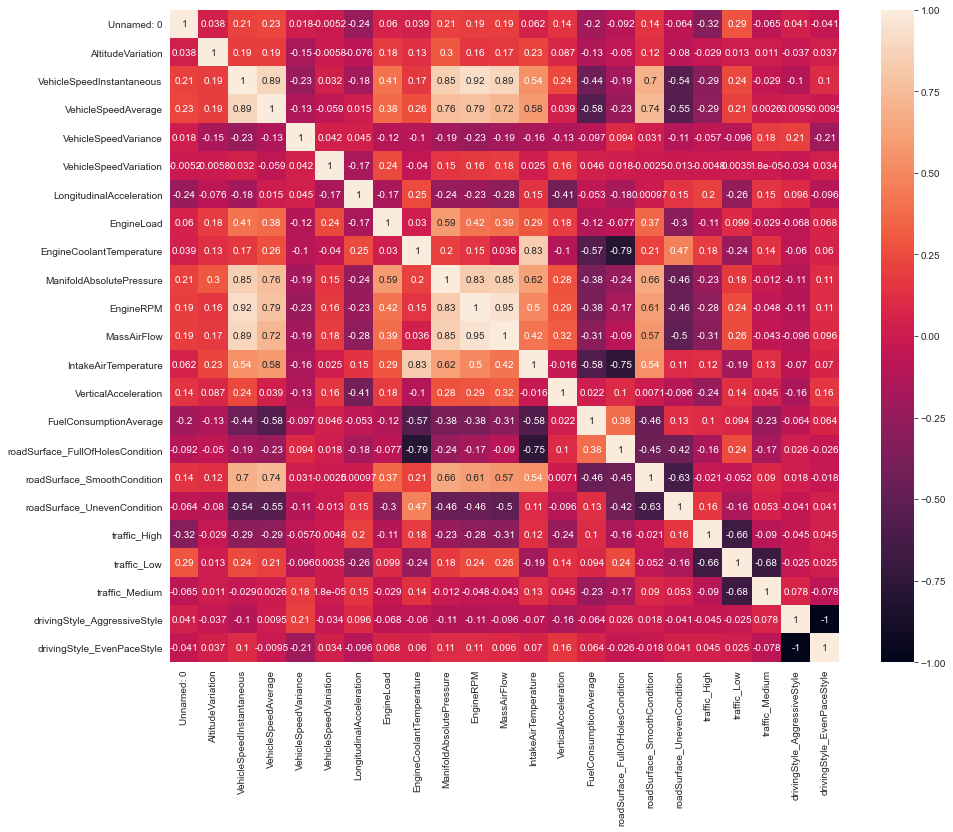

In [58]:
corr_heatmap(df3_dummies,15,12)

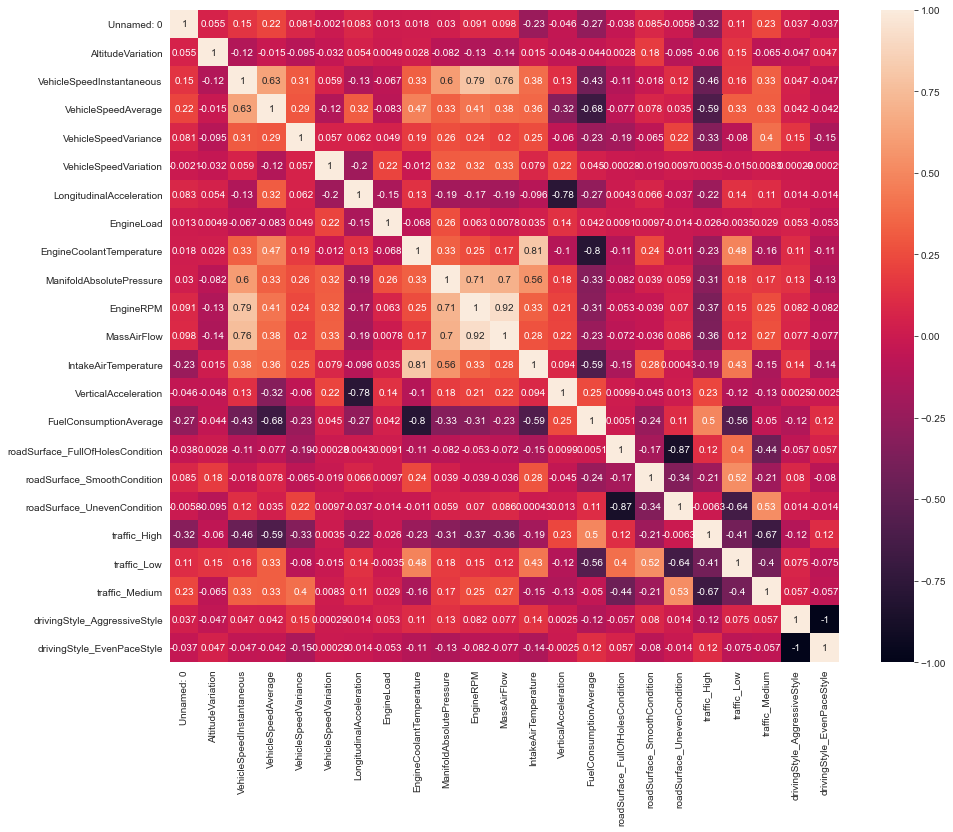

In [59]:
corr_heatmap(df4_dummies,15,12)

In [60]:
df_new = pd.DataFrame(columns=list(df1_dummies.columns))
df_new = pd.concat([df1_dummies, df2_dummies, df3_dummies, df4_dummies], axis=0)
print(df_new.shape)
df_new.head()

(23775, 23)


Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
0        59.0          -2.299988                  25.670519   
1        60.0          -2.099976                  24.094259   
2        61.0          -1.500000                  22.743179   
3        62.0           0.100037                  22.292820   
4        63.0           0.099976                  23.643900   

   VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
0            13.223501            121.592690              -2.476980   
1            13.638919            120.422571              -1.576260   
2            14.031043            118.456769              -1.351080   
3            14.171073            117.571308              -0.450359   
4            14.328954            117.074149               1.351080   

   LongitudinalAcceleration  EngineLoad  EngineCoolantTemperature  \
0                    0.3555    4.705883                      68.0   
1                    0.4492   10.588236                      68.0   
2                    0.4258   27.450981                      68.0   
3                    0.4140   24.313726                      69.0   
4                    0.3945   20.000000                      69.0   

   ManifoldAbsolutePressure  ...  VerticalAcceleration  \
0                     106.0  ...               -0.1133   
1                     103.0  ...               -0.1289   
2                     103.0  ...               -0.1328   
3                     104.0  ...               -0.0859   
4                     104.0  ...               -0.0664   

   FuelConsumptionAverage  roadSurface_SmoothCondition  \
0               19.497335                            1   
1               19.515722                            1   
2               19.441765                            1   
3               19.388769                            1   
4               19.301638                            1   

   roadSurface_UnevenCondition  traffic_High  traffic_Low  traffic_Medium  \
0                            0             0            1               0   
1                            0             0            1               0   
2                            0             0            1               0   
3                            0             0            1               0   
4                            0             0            1               0   

   drivingStyle_AggressiveStyle  drivingStyle_EvenPaceStyle  \
0                             0                           1   
1                             0                           1   
2                             0                           1   
3                             0                           1   
4                             0                           1   

   roadSurface_FullOfHolesCondition  
0                               NaN  
1                               NaN  
2                               NaN  
3                               NaN  
4                               NaN  

[5 rows x 23 columns]

In [61]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23775 entries, 0 to 4445
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        23775 non-null  float64
 1   AltitudeVariation                 23775 non-null  float64
 2   VehicleSpeedInstantaneous         23775 non-null  float64
 3   VehicleSpeedAverage               23775 non-null  float64
 4   VehicleSpeedVariance              23775 non-null  float64
 5   VehicleSpeedVariation             23775 non-null  float64
 6   LongitudinalAcceleration          23775 non-null  float64
 7   EngineLoad                        23775 non-null  float64
 8   EngineCoolantTemperature          23775 non-null  float64
 9   ManifoldAbsolutePressure          23775 non-null  float64
 10  EngineRPM                         23775 non-null  float64
 11  MassAirFlow                       23775 non-null  float64
 12  Intak

In [62]:
df_new = df_new.fillna(0)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23775 entries, 0 to 4445
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        23775 non-null  float64
 1   AltitudeVariation                 23775 non-null  float64
 2   VehicleSpeedInstantaneous         23775 non-null  float64
 3   VehicleSpeedAverage               23775 non-null  float64
 4   VehicleSpeedVariance              23775 non-null  float64
 5   VehicleSpeedVariation             23775 non-null  float64
 6   LongitudinalAcceleration          23775 non-null  float64
 7   EngineLoad                        23775 non-null  float64
 8   EngineCoolantTemperature          23775 non-null  float64
 9   ManifoldAbsolutePressure          23775 non-null  float64
 10  EngineRPM                         23775 non-null  float64
 11  MassAirFlow                       23775 non-null  float64
 12  Intak

In [63]:
df_new.head()

Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
0        59.0          -2.299988                  25.670519   
1        60.0          -2.099976                  24.094259   
2        61.0          -1.500000                  22.743179   
3        62.0           0.100037                  22.292820   
4        63.0           0.099976                  23.643900   

   VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
0            13.223501            121.592690              -2.476980   
1            13.638919            120.422571              -1.576260   
2            14.031043            118.456769              -1.351080   
3            14.171073            117.571308              -0.450359   
4            14.328954            117.074149               1.351080   

   LongitudinalAcceleration  EngineLoad  EngineCoolantTemperature  \
0                    0.3555    4.705883                      68.0   
1                    0.4492   10.588236                      68.0   
2                    0.4258   27.450981                      68.0   
3                    0.4140   24.313726                      69.0   
4                    0.3945   20.000000                      69.0   

   ManifoldAbsolutePressure  ...  VerticalAcceleration  \
0                     106.0  ...               -0.1133   
1                     103.0  ...               -0.1289   
2                     103.0  ...               -0.1328   
3                     104.0  ...               -0.0859   
4                     104.0  ...               -0.0664   

   FuelConsumptionAverage  roadSurface_SmoothCondition  \
0               19.497335                            1   
1               19.515722                            1   
2               19.441765                            1   
3               19.388769                            1   
4               19.301638                            1   

   roadSurface_UnevenCondition  traffic_High  traffic_Low  traffic_Medium  \
0                            0             0            1               0   
1                            0             0            1               0   
2                            0             0            1               0   
3                            0             0            1               0   
4                            0             0            1               0   

   drivingStyle_AggressiveStyle  drivingStyle_EvenPaceStyle  \
0                             0                           1   
1                             0                           1   
2                             0                           1   
3                             0                           1   
4                             0                           1   

   roadSurface_FullOfHolesCondition  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                               0.0  

[5 rows x 23 columns]

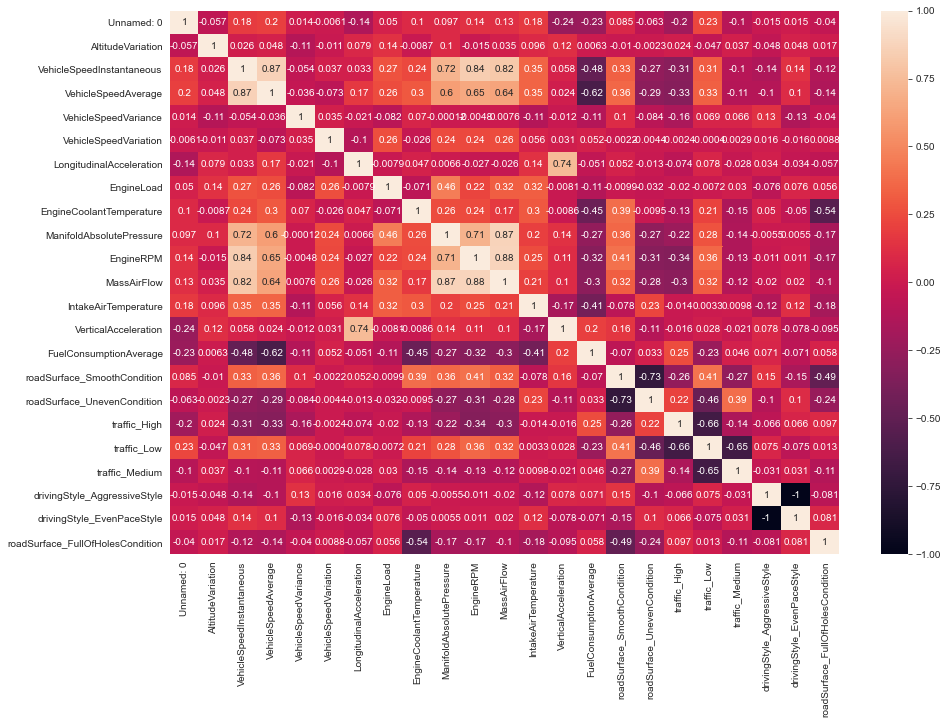

In [64]:
corr_heatmap(df_new, 15, 10)

In [66]:
corr_matrix = df_new.corr()
corr_matrix['traffic_High'].sort_values(ascending=False, key=abs)

traffic_High                        1.000000
traffic_Low                        -0.655378
EngineRPM                          -0.335138
VehicleSpeedAverage                -0.325359
VehicleSpeedInstantaneous          -0.307535
MassAirFlow                        -0.298347
roadSurface_SmoothCondition        -0.263392
FuelConsumptionAverage              0.251374
ManifoldAbsolutePressure           -0.223807
roadSurface_UnevenCondition         0.216853
Unnamed: 0                         -0.202326
VehicleSpeedVariance               -0.155008
traffic_Medium                     -0.144706
EngineCoolantTemperature           -0.131253
roadSurface_FullOfHolesCondition    0.097382
LongitudinalAcceleration           -0.073743
drivingStyle_AggressiveStyle       -0.066326
drivingStyle_EvenPaceStyle          0.066326
AltitudeVariation                   0.024357
EngineLoad                         -0.020182
VerticalAcceleration               -0.016109
IntakeAirTemperature               -0.014011
VehicleSpe

In [70]:
corr_matrix['traffic_Low'].sort_values(ascending=False, key=abs)

traffic_Low                         1.000000
traffic_High                       -0.655378
traffic_Medium                     -0.652514
roadSurface_UnevenCondition        -0.461833
roadSurface_SmoothCondition         0.406635
EngineRPM                           0.359630
VehicleSpeedAverage                 0.330973
MassAirFlow                         0.317092
VehicleSpeedInstantaneous           0.312505
ManifoldAbsolutePressure            0.275677
Unnamed: 0                          0.231699
FuelConsumptionAverage             -0.227388
EngineCoolantTemperature            0.213594
LongitudinalAcceleration            0.077563
drivingStyle_AggressiveStyle        0.074799
drivingStyle_EvenPaceStyle         -0.074799
VehicleSpeedVariance                0.068700
AltitudeVariation                  -0.047199
VerticalAcceleration                0.028261
roadSurface_FullOfHolesCondition    0.012802
EngineLoad                         -0.007151
IntakeAirTemperature                0.003280
VehicleSpe

In [71]:
corr_matrix['traffic_Medium'].sort_values(ascending=False, key=abs)

traffic_Medium                      1.000000
traffic_Low                        -0.652514
roadSurface_UnevenCondition         0.387456
roadSurface_SmoothCondition        -0.268453
EngineCoolantTemperature           -0.148134
traffic_High                       -0.144706
ManifoldAbsolutePressure           -0.136608
EngineRPM                          -0.134893
MassAirFlow                        -0.116078
roadSurface_FullOfHolesCondition   -0.114473
VehicleSpeedAverage                -0.107162
VehicleSpeedInstantaneous          -0.100850
Unnamed: 0                         -0.100546
VehicleSpeedVariance                0.065516
FuelConsumptionAverage              0.045690
AltitudeVariation                   0.037395
drivingStyle_AggressiveStyle       -0.031446
drivingStyle_EvenPaceStyle          0.031446
EngineLoad                          0.029616
LongitudinalAcceleration           -0.027627
VerticalAcceleration               -0.020862
IntakeAirTemperature                0.009761
VehicleSpe

In [67]:
corr_matrix['roadSurface_SmoothCondition'].sort_values(ascending=False, key=abs)

roadSurface_SmoothCondition         1.000000
roadSurface_UnevenCondition        -0.732700
roadSurface_FullOfHolesCondition   -0.486075
traffic_Low                         0.406635
EngineRPM                           0.405055
EngineCoolantTemperature            0.386413
ManifoldAbsolutePressure            0.362930
VehicleSpeedAverage                 0.362164
VehicleSpeedInstantaneous           0.331518
MassAirFlow                         0.321892
traffic_Medium                     -0.268453
traffic_High                       -0.263392
VerticalAcceleration                0.163430
drivingStyle_AggressiveStyle        0.150004
drivingStyle_EvenPaceStyle         -0.150004
VehicleSpeedVariance                0.104172
Unnamed: 0                          0.084757
IntakeAirTemperature               -0.077715
FuelConsumptionAverage             -0.070241
LongitudinalAcceleration            0.051849
AltitudeVariation                  -0.009995
EngineLoad                         -0.009920
VehicleSpe

In [68]:
corr_matrix['roadSurface_UnevenCondition'].sort_values(ascending=False, key=abs)

roadSurface_UnevenCondition         1.000000
roadSurface_SmoothCondition        -0.732700
traffic_Low                        -0.461833
traffic_Medium                      0.387456
EngineRPM                          -0.314607
VehicleSpeedAverage                -0.294049
MassAirFlow                        -0.276856
ManifoldAbsolutePressure           -0.273990
VehicleSpeedInstantaneous          -0.271835
roadSurface_FullOfHolesCondition   -0.238599
IntakeAirTemperature                0.225904
traffic_High                        0.216853
VerticalAcceleration               -0.107318
drivingStyle_AggressiveStyle       -0.103855
drivingStyle_EvenPaceStyle          0.103855
VehicleSpeedVariance               -0.084312
Unnamed: 0                         -0.063293
FuelConsumptionAverage              0.032684
EngineLoad                         -0.032286
LongitudinalAcceleration           -0.012922
EngineCoolantTemperature           -0.009461
VehicleSpeedVariation              -0.004375
AltitudeVa

In [74]:
corr_matrix['roadSurface_FullOfHolesCondition'].sort_values(ascending=False, key=abs)

roadSurface_FullOfHolesCondition    1.000000
EngineCoolantTemperature           -0.539245
roadSurface_SmoothCondition        -0.486075
roadSurface_UnevenCondition        -0.238599
IntakeAirTemperature               -0.179193
EngineRPM                          -0.174001
ManifoldAbsolutePressure           -0.166047
VehicleSpeedAverage                -0.139195
VehicleSpeedInstantaneous          -0.123990
traffic_Medium                     -0.114473
MassAirFlow                        -0.103807
traffic_High                        0.097382
VerticalAcceleration               -0.095398
drivingStyle_AggressiveStyle       -0.080686
drivingStyle_EvenPaceStyle          0.080686
FuelConsumptionAverage              0.058261
LongitudinalAcceleration           -0.057393
EngineLoad                          0.055614
VehicleSpeedVariance               -0.040382
Unnamed: 0                         -0.039668
AltitudeVariation                   0.017164
traffic_Low                         0.012802
VehicleSpe

### Some Next Steps:

- Check for outliers in numerical variables

- Choose a target variable (traffic or roadSurface)

- Decide which variables to use as predictors for our model (can keep most, and try reducing the number of features again later when we're training the model)

- Drop unnnecessary columns

- Split datasets in training/testing sets (using stratification because of the inbalance of caegory classes, maybe split the individual datasets first then join the sets, but it might not make a difference)

- Build a preprocessing pipeline - maybe some of the variables need to be log-transformed to reduce their skewness (should only be done on variables which don't have any zero or negative values) and then need to decide whether to use StandardScaler or Max-Min

- Choose 2 classification models and train

- Compare results on test set
